## ** 기말고사 프로젝트 <기말고사 프로젝트 - 100점>**

### **(1) 각각의 문제 바로 아래에 답을 작성 후, Bigdata_project(기말고사).ipynb 파일을 한림SmartLEAD에 제출할 것**
### **(2) 제출 데드라인 : 2021.11.29(월요일) ~ 2021.12.12(일요일) 23:59 까지**
### **(3) 부정행위 적발 시, 원본(보여준 사람)과 복사본(베낀 사람) 모두 0점 처리**
### **(4) !!해당 문제의 코드와 출력 결과를 반드시 기록할 것(둘 중 하나라도 없으면 해당 문제 0점처리)!!**

- - -


### **1. Titanic 데이터를 사용하여 ``로지스틱 회귀분석(Logistic Regression)``,``의사결정트리(Decision Tree)``, ``랜덤포레스트(Randomforest)``, ``SVM(Support Vector Machine)``생성 모델을 만들고 생성한 모델을 Kaggle에 제출하여 점수를 획득 하시오.**

<br>

#### **다음의 조건을 만족해야 함**

```
## 조건
1. 모델 생성에 필요한 전처리 과정을 진행 하시오.
2. 모든 모델의 생성 과정을 코드로 명시 하시오.
3. 적절한 반응변수와 설명변수를 설정 하시오
4. 주어진 Train set으로 모델을 생성하시오.
5. Feature selection(변수 선택), Hyperparameter 튜닝을 진행 하시오.
6. Test set을 이용한 Predict(예측)
7. 생성한 모델중 가장 높은 점수를 획득한 모델의 최고 점수를 Keggle에 올려 Keggle점수 이미지를 첨부하시오.
```

#### Confusion Matrix plot code

In [2]:
#https://stackoverflow.com/questions/23891140/r-how-to-visualize-confusion-matrix-using-the-caret-package

draw_confusion_matrix <- function(cm) {

  total <- sum(cm$table)
  res <- as.numeric(cm$table)

  # Generate color gradients. Palettes come from RColorBrewer.
  greenPalette <- c("#F7FCF5","#E5F5E0","#C7E9C0","#A1D99B","#74C476","#41AB5D","#238B45","#006D2C","#00441B")
  redPalette <- c("#FFF5F0","#FEE0D2","#FCBBA1","#FC9272","#FB6A4A","#EF3B2C","#CB181D","#A50F15","#67000D")
  getColor <- function (greenOrRed = "green", amount = 0) {
    if (amount == 0)
      return("#FFFFFF")
    palette <- greenPalette
    if (greenOrRed == "red")
      palette <- redPalette
    colorRampPalette(palette)(100)[10 + ceiling(90 * amount / total)]
  }

  # set the basic layout
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  classes = colnames(cm$table)
  rect(150, 430, 240, 370, col=getColor("green", res[1]))
  text(195, 435, classes[1], cex=1.2)
  rect(250, 430, 340, 370, col=getColor("red", res[3]))
  text(295, 435, classes[2], cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col=getColor("red", res[2]))
  rect(250, 305, 340, 365, col=getColor("green", res[4]))
  text(140, 400, classes[1], cex=1.2, srt=90)
  text(140, 335, classes[2], cex=1.2, srt=90)

  # add in the cm results
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}

####시작하는데 필요한 라이브러리.

In [3]:
#data.table과 타이리버스 패키지 설치 및 라이브러리 선언.
install.packages("data.table")
library(data.table)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [4]:
#fread를 통해 csv파일을 읽어오기.
train <- fread("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/train.csv") %>%
 as_tibble() ## train 데이터 

In [5]:
#데이터 구조확인
train %>% str()

tibble [891 × 12] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [6]:
#test 데이터 확인
test <- fread("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/test.csv") %>%
 as_tibble() ## test 데이터 

In [7]:
#test데이터는 Survived 데이터가 빠져있음.
test %>% str()

tibble [418 × 11] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:418] 892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int [1:418] 3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr [1:418] "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr [1:418] "male" "female" "male" "male" ...
 $ Age        : num [1:418] 34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int [1:418] 0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int [1:418] 0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr [1:418] "330911" "363272" "240276" "315154" ...
 $ Fare       : num [1:418] 7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr [1:418] "" "" "" "" ...
 $ Embarked   : chr [1:418] "Q" "S" "Q" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


#### **1. 로지스틱 회귀분석(Logistic Regression)**

In [8]:
#로지스틱 회기분석에 필요한 packages 그리고 plot 사이즈 지정.

install.packages(c("caret", "e1071", "Hmisc"))
options(repr.plot.width=10, repr.plot.height=10)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘proxy’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’




In [9]:
#str을 통해 데이터의 속성 및 데이터 타입 확인.
#범주형 데이터가 아니면 범주형 데이터로 바꿔주는 과정을 위해선 필요.
train %>% str()

#summary를 통한 결측값, 그리고 범주형 데아터 확인.
train %>% summary()

tibble [891 × 12] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [10]:
#범주형 데이터 확인.
train$Survived %>% unique()
train$Pclass %>% unique()
train$Sex %>% unique() 
train$Ticket %>% unique()
train$Embarked %>% unique()

#필요없는 문자형 데이터 제거 -> 필요한 문자형 데이터인 Embarked는 범주형으로 전환
#PassengerId -> 그냥 1부터 순차적으로 증가해서 승객 수까지 증가. 필요 없음
#이름 -> 문자형 데이터 필요없음.
#cabin -> 선실번호 -> 범주형 데이터인 Embarked와 pClass 사용할꺼니까 필요 없다고 생각이 되서 제거.
#Ticket -> 찍어보면 알겠지만 너무 다양함. 필요 없음.
train_DF <- select(train, -PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Survived","Sex","Embarked"), factor)

#필요없는 속성 제거한 데이터는 Train_DF
summary(train_DF)

[1] 0 1

[1] 3 1 2

[1] "male"   "female"

[1] "A/5 21171"          "PC 17599"           "STON/O2. 3101282"  
  [4] "113803"             "373450"             "330877"            
  [7] "17463"              "349909"             "347742"            
 [10] "237736"             "PP 9549"            "113783"            
 [13] "A/5. 2151"          "347082"             "350406"            
 [16] "248706"             "382652"             "244373"            
 [19] "345763"             "2649"               "239865"            
 [22] "248698"             "330923"             "113788"            
 [25] "347077"             "2631"               "19950"             
 [28] "330959"             "349216"             "PC 17601"          
 [31] "PC 17569"           "335677"             "C.A. 24579"        
 [34] "PC 17604"           "113789"             "2677"              
 [37] "A./5. 2152"         "345764"             "2651"              
 [40] "7546"               "11668"              "349253"            
 [43] "SC/Paris 2123"      "330958"             "S.C./A.4. 23567"   
 [46] "370371"             "14311"              "2662"              
 [49] "349237"             "3101295"            "A/4. 39886"        
 [52] "PC 17572"           "2926"               "113509"            
 [55] "19947"              "C.A. 31026"         "2697"              
 [58] "C.A. 34651"         "CA 2144"            "2669"              
 [61] "113572"             "36973"              "347088"            
 [64] "PC 17605"           "2661"               "C.A. 29395"        
 [67] "S.P. 3464"          "3101281"            "315151"            
 [70] "C.A. 33111"         "S.O.C. 14879"       "2680"              
 [73] "1601"               "348123"             "349208"            
 [76] "374746"             "248738"             "364516"            
 [79] "345767"             "345779"             "330932"            
 [82] "113059"             "SO/C 14885"         "3101278"           
 [85] "W./C. 6608"         "SOTON/OQ 392086"    "343275"            
 [88] "343276"             "347466"             "W.E.P. 5734"       
 [91] "C.A. 2315"          "364500"             "374910"            
 [94] "PC 17754"           "PC 17759"           "231919"            
 [97] "244367"             "349245"             "349215"            
[100] "35281"              "7540"               "3101276"           
[103] "349207"             "343120"             "312991"            
[106] "349249"             "371110"             "110465"            
[109] "2665"               "324669"             "4136"              
[112] "2627"               "STON/O 2. 3101294"  "370369"            
[115] "PC 17558"           "A4. 54510"          "27267"             
[118] "370372"             "C 17369"            "2668"              
[121] "347061"             "349241"             "SOTON/O.Q. 3101307"
[124] "A/5. 3337"          "228414"             "C.A. 29178"        
[127] "SC/PARIS 2133"      "11752"              "7534"              
[130] "PC 17593"           "2678"               "347081"            
[133] "STON/O2. 3101279"   "365222"             "231945"            
[136] "C.A. 33112"         "350043"             "230080"            
[139] "244310"             "S.O.P. 1166"        "113776"            
[142] "A.5. 11206"         "A/5. 851"           "Fa 265302"         
[145] "PC 17597"           "35851"              "SOTON/OQ 392090"   
[148] "315037"             "CA. 2343"           "371362"            
[151] "C.A. 33595"         "347068"             "315093"            
[154] "363291"             "113505"             "PC 17318"          
[157] "111240"             "STON/O 2. 3101280"  "17764"             
[160] "350404"             "4133"               "PC 17595"          
[163] "250653"             "LINE"               "SC/PARIS 2131"     
[166] "230136"             "315153"             "113767"            
[169] "370365"             "111428"             "364849"            
[172] "349247"             "234604"             "28424"             


[1] "S" "C" "Q" ""

 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:20.12   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.70   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
                                       NA's   :177                    
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           
                                           

In [11]:
#str 함수를 통한 범주형 데이터 변환 확인.
train_DF %>% str()

tibble [891 × 8] (S3: tbl_df/tbl/data.frame)
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 


####처음에는 na.omit를 통해 결측값을 제거하였으나 모델의 정확도가 너무 떨어져 중간값을 넣는 것으로 수정하였습니다.!

In [12]:
#결측값이 존재하는 Age 속성에 대해 impute - median를 통해 NA값을 중간값으로 채움
library(Hmisc)
train_DF$Age <- impute(train_DF$Age, median)

# Train 데이터에는 Fare 속성에 Na값 존재하지않음.
# test_DF$Fare <- impute(test_DF$Fare, median)

summary(train_DF)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units





 177 values imputed to 28 



 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:22.00   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.36   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:35.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           

In [13]:
#아까 summary(train_DF) 에서 Age에 결측값이 나왔으므로 결측값 제거 필요.
#머신러닝에서 데이터의 NA값 발생시 중간값으로 채우는 것 보단 제거하는게 낫다고 배웠으므로 저는 제거를 하는 쪽을 선택했습니다.
#타이나티닉은 데이터 수가 부족하다고 하셨으므로 대신 밑에서 테스트 데이터의 비율을 늘리겠습니다.

# -> 정확도가 너무 떨어져서 결측값에 중앙값 채우는 걸로 변경하였습니다. 
#train / test 비율을 0.95까지늘렸는데 결과가 너무 좋지 않았습니다. 
# test데이터로 오차 측정할 때   -> 다시 9대 1로 변경.

# 혹시 모르니 다시 한번 결측값이 존재한다면 제거.
train_DF <- train_DF %>% na.omit()
summary(train_DF)



 177 values imputed to 28 



 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:22.00   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.36   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:35.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           

#### 다시 돌아와 test / train set 을 분리합니다.

In [14]:
# 11주차 강의에서 타이타닉 데이터가 별로 없어서 test : train 비율을 9:1로 나누셨다고 하셨던걸로 기억합니다.
# 저 또한 똑같이 9:1로 나누어 작업하였습니다.
index <- caret::createDataPartition(y = train_DF$Survived, p = 0.9, list = FALSE)
train_log <- train_DF[index, ]
test_log <- train_DF[-index, ]

train_log %>% show()
test_log %>% show()

# A tibble: 803 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>     <int> <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0             3 male   22           1     0  7.25 S       
 2 1             1 female 38           1     0 71.3  C       
 3 1             3 female 26           0     0  7.92 S       
 4 1             1 female 35           1     0 53.1  S       
 5 0             3 male   35           0     0  8.05 S       
 6 0             3 male   28           0     0  8.46 Q       
 7 0             1 male   54           0     0 51.9  S       
 8 1             3 female 27           0     2 11.1  S       
 9 1             2 female 14           1     0 30.1  C       
10 1             3 female  4           1     1 16.7  S       
# … with 793 more rows
# A tibble: 88 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>     <int> <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0             3 male    2.00        3     1 21.1  S       
 2 0    

In [15]:
# 위에서 만든 train 데이터로 모델을 만들어 학습을 진행합니다. 
# 반응변수 : 당연히 Survived,
# 설명변수 : 그 외의 속성, ~ 으로 표시
# glm : 일반화 선형 모델
# family = "binomial" -> 로지스틱 회기모형.
log_model <- glm(Survived ~ ., data = train_log, family = "binomial")
summary(log_model)


Call:
glm(formula = Survived ~ ., family = "binomial", data = train_log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5845  -0.5795  -0.4138   0.6075   2.4503  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  17.632034 611.033164   0.029  0.97698    
Pclass       -1.096664   0.153880  -7.127 1.03e-12 ***
Sexmale      -2.813898   0.213787 -13.162  < 2e-16 ***
Age          -0.038719   0.008263  -4.686 2.79e-06 ***
SibSp        -0.336198   0.116050  -2.897  0.00377 ** 
Parch        -0.066003   0.125733  -0.525  0.59962    
Fare          0.000354   0.002561   0.138  0.89009    
EmbarkedC   -12.289639 611.032952  -0.020  0.98395    
EmbarkedQ   -12.271455 611.033012  -0.020  0.98398    
EmbarkedS   -12.739719 611.032934  -0.021  0.98337    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1069.24  on 802  degrees of freedom
Residual de

In [16]:
#step을 통해 *이 붙지않은 (p_value값이 0.05보다 큰 값) 중요하지 않은 속성을 제거합니다. 
log_model_step <- step(log_model, direction = "backward")

Start:  AIC=719.43
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked

           Df Deviance    AIC
- Fare      1   699.45 717.45
- Parch     1   699.71 717.71
- Embarked  3   704.41 718.41
<none>          699.43 719.43
- SibSp     1   709.32 727.32
- Age       1   723.04 741.04
- Pclass    1   751.38 769.38
- Sex       1   920.21 938.21

Step:  AIC=717.45
Survived ~ Pclass + Sex + Age + SibSp + Parch + Embarked

           Df Deviance    AIC
- Parch     1   699.71 715.71
- Embarked  3   704.74 716.74
<none>          699.45 717.45
- SibSp     1   709.48 725.48
- Age       1   723.25 739.25
- Pclass    1   778.70 794.70
- Sex       1   921.21 937.21

Step:  AIC=715.71
Survived ~ Pclass + Sex + Age + SibSp + Embarked

           Df Deviance    AIC
- Embarked  3   705.12 715.12
<none>          699.71 715.71
- SibSp     1   711.92 725.92
- Age       1   723.38 737.38
- Pclass    1   779.05 793.05
- Sex       1   929.80 943.80

Step:  AIC=715.12
Survived ~ Pclass + Sex + Age +

In [17]:
#step을 통해 제거한 후 남은 모델의 재구성.
summary(log_model_step)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp, family = "binomial", 
    data = train_log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6649  -0.5847  -0.4124   0.5998   2.4475  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.094872   0.502154  10.146  < 2e-16 ***
Pclass      -1.118768   0.126048  -8.876  < 2e-16 ***
Sexmale     -2.845932   0.206862 -13.758  < 2e-16 ***
Age         -0.038656   0.008194  -4.718 2.38e-06 ***
SibSp       -0.376998   0.111247  -3.389 0.000702 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1069.24  on 802  degrees of freedom
Residual deviance:  705.12  on 798  degrees of freedom
AIC: 715.12

Number of Fisher Scoring iterations: 5


In [18]:
#로지스틱 회기분석을 통해 만든 모델의 예측 결과 -> predict_value_log
#실제 데이터에서 반응변수만 선택 후 predict_value_log와 bind_cols 즉 열을 합쳐 보기 좋게 만듬.
predict_value_log <- predict(log_model_step, test_log, type = "response") %>% tibble(predict_value_log = .)
predict_check_log <- test_log %>% select(Survived) %>% dplyr::bind_cols(., predict_value_log) 
predict_check_log %>% show()

# A tibble: 88 × 2
   Survived predict_value_log
   <fct>                <dbl>
 1 0                   0.0898
 2 0                   0.768 
 3 1                   0.658 
 4 1                   0.914 
 5 1                   0.658 
 6 0                   0.0318
 7 1                   0.495 
 8 0                   0.0972
 9 0                   0.0327
10 0                   0.124 
# … with 78 more rows


In [19]:
#cutoff value를 0.5로 설정해 0.5보다 높으면 생존, 0.5보다 낮으면 사망.
#mutate를 통해 cut-off value를 설정한 값의 열을 추가해 비교하기 쉽게한다.
predict_cutoff_log <- predict_check_log %>% mutate(predict_value_cutoff_log = as.factor(ifelse(predict_value_log > 0.5, 1, 0)))
predict_cutoff_log %>% show()

# A tibble: 88 × 3
   Survived predict_value_log predict_value_cutoff_log
   <fct>                <dbl> <fct>                   
 1 0                   0.0898 0                       
 2 0                   0.768  1                       
 3 1                   0.658  1                       
 4 1                   0.914  1                       
 5 1                   0.658  1                       
 6 0                   0.0318 0                       
 7 1                   0.495  0                       
 8 0                   0.0972 0                       
 9 0                   0.0327 0                       
10 0                   0.124  0                       
# … with 78 more rows


In [20]:
#caret에서 제공하는 ConfusionMatrix 사용하여 예측 결과 보기
caret::confusionMatrix(predict_cutoff_log$Survived, predict_cutoff_log$predict_value_cutoff_log)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 44 10
         1 14 20
                                          
               Accuracy : 0.7273          
                 95% CI : (0.6219, 0.8168)
    No Information Rate : 0.6591          
    P-Value [Acc > NIR] : 0.1067          
                                          
                  Kappa : 0.412           
                                          
 Mcnemar's Test P-Value : 0.5403          
                                          
            Sensitivity : 0.7586          
            Specificity : 0.6667          
         Pos Pred Value : 0.8148          
         Neg Pred Value : 0.5882          
             Prevalence : 0.6591          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.6136          
      Balanced Accuracy : 0.7126          
                                          
       'Positive' Class : 0               
                                    

In [21]:
#ROC커브를 그려보기 위해 패키지 설치 후 라이브러리 사용.
install.packages("pROC")
library("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Setting levels: control = 0, case = 1

Setting direction: controls < cases



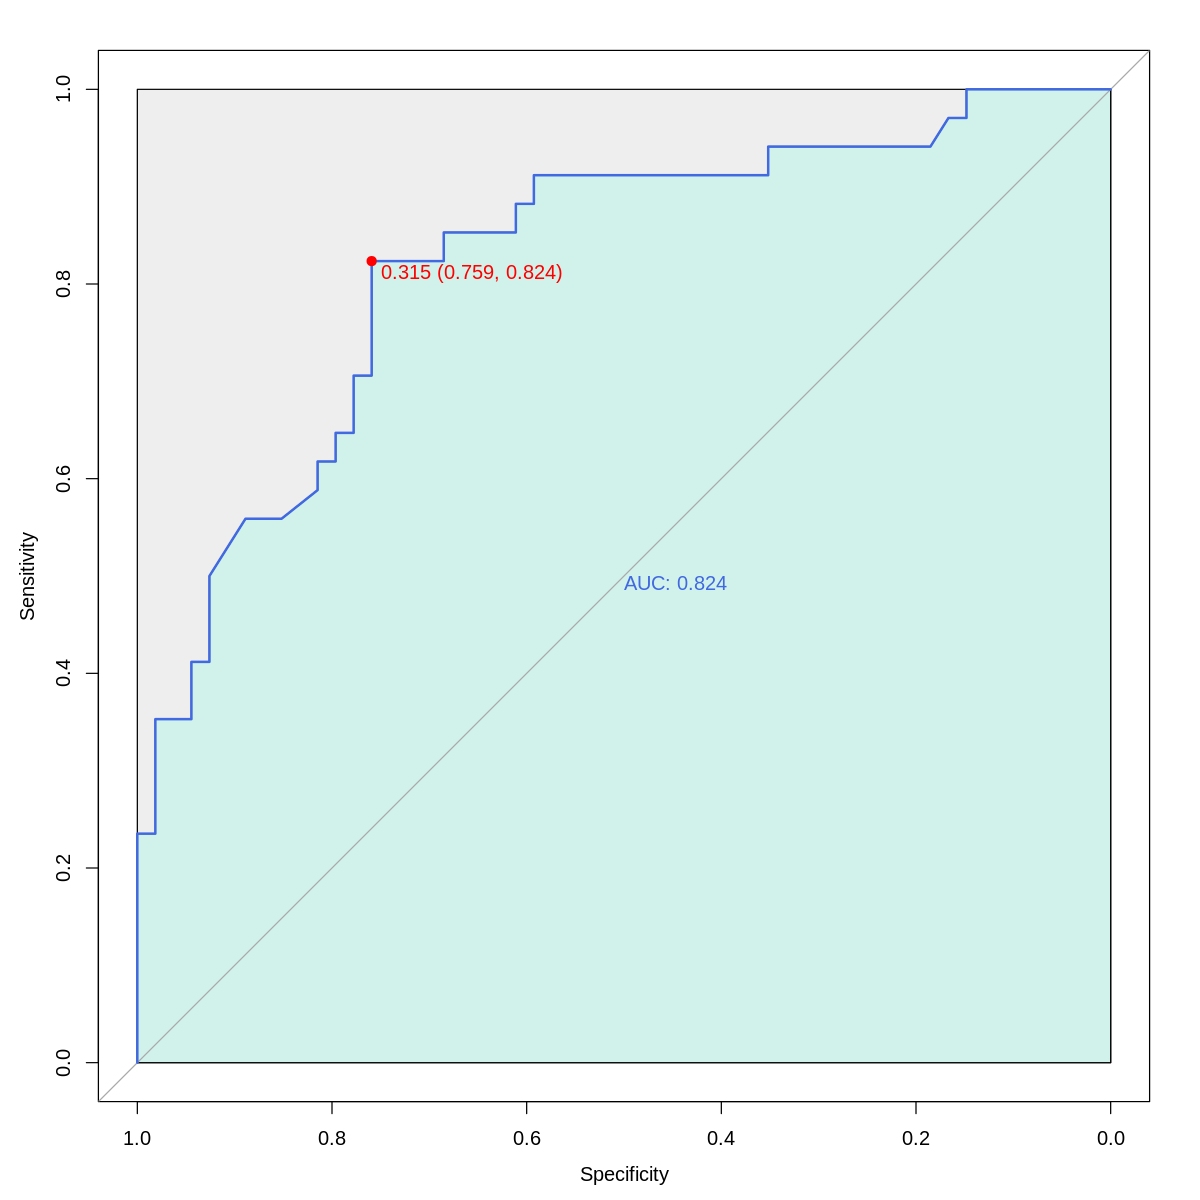

In [22]:
roc_c <- roc(predict_cutoff_log$Survived, predict_cutoff_log$predict_value_log) # 실제정답과 glm 예측된 확률
plot.roc(roc_c,   
        col="royalblue",  
        print.auc=TRUE, 
        max.auc.polygon=TRUE,   
        print.thres=TRUE, print.thres.pch=19, print.thres.col = "red",
        auc.polygon=TRUE, auc.polygon.col="#D1F2EB")

In [23]:
#최적의 cut off value 찾기 -> 그리고 score로 저장 
score = pROC::coords(roc_c, "best", ret = "threshold", transpose = F)
cut_off_value_score = score[1,1]
cut_off_value_score

[1] 0.3152859

In [24]:
#cutoff value를 위에서 나온 cut off value로 설정해 best_cutoff_value 보다 높으면 생존, 낮으면 사망.
#mutate를 통해 cut-off value를 설정한 값의 열을 추가해 비교하기 쉽게한다.

#head(20)을 통해 20개를 본다. 20번째 데이터를 보면 cut_off_value가 잘 설정된 것을 볼 수 있다.
predict_best_cutoff_log <- predict_check_log %>% mutate(predict_best_cutoff_log = as.factor(ifelse(predict_value_log > cut_off_value_score, 1, 0)))
predict_best_cutoff_log %>% head(20)

Survived,predict_value_log,predict_best_cutoff_log
<fct>,<dbl>,<fct>
0,0.08983342,0
0,0.76805994,1
1,0.65840852,1
1,0.91406973,1
1,0.65840852,1
0,0.03175093,0
1,0.49482995,1
0,0.09723093,0
0,0.03267113,0


In [25]:
#Cut Off value 수정
#caret에서 제공하는 ConfusionMatrix 사용하여 예측 결과 보기
caret::confusionMatrix(predict_best_cutoff_log$Survived, predict_best_cutoff_log$predict_best_cutoff_log)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 41 13
         1  6 28
                                          
               Accuracy : 0.7841          
                 95% CI : (0.6835, 0.8647)
    No Information Rate : 0.5341          
    P-Value [Acc > NIR] : 1.022e-06       
                                          
                  Kappa : 0.5614          
                                          
 Mcnemar's Test P-Value : 0.1687          
                                          
            Sensitivity : 0.8723          
            Specificity : 0.6829          
         Pos Pred Value : 0.7593          
         Neg Pred Value : 0.8235          
             Prevalence : 0.5341          
         Detection Rate : 0.4659          
   Detection Prevalence : 0.6136          
      Balanced Accuracy : 0.7776          
                                          
       'Positive' Class : 0               
                                    

#### 케글 데이터 불러와서 비교.

In [26]:
str(test)
#보니까 survived 빼고는 비슷함. 전처리 과정은 위와 똑같이 진행해야함.

tibble [418 × 11] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:418] 892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int [1:418] 3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr [1:418] "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr [1:418] "male" "female" "male" "male" ...
 $ Age        : num [1:418] 34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int [1:418] 0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int [1:418] 0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr [1:418] "330911" "363272" "240276" "315154" ...
 $ Fare       : num [1:418] 7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr [1:418] "" "" "" "" ...
 $ Embarked   : chr [1:418] "Q" "S" "Q" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [27]:
#위의 코드와 똑같이 진행. but Survived 빠졌으므로 mutate_at에는 Survived 없움.
test_DF <- select(test, -PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Sex","Embarked"), factor)

#필요없는 속성 제거한 데이터는 Test_DF
summary(test_DF)

     Pclass          Sex           Age            SibSp            Parch       
 Min.   :1.000   female:152   Min.   : 0.17   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   male  :266   1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :3.000                Median :27.00   Median :0.0000   Median :0.0000  
 Mean   :2.266                Mean   :30.27   Mean   :0.4474   Mean   :0.3923  
 3rd Qu.:3.000                3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :3.000                Max.   :76.00   Max.   :8.0000   Max.   :9.0000  
                              NA's   :86                                       
      Fare         Embarked
 Min.   :  0.000   C:102   
 1st Qu.:  7.896   Q: 46   
 Median : 14.454   S:270   
 Mean   : 35.627           
 3rd Qu.: 31.500           
 Max.   :512.329           
 NA's   :1                 

####처음에는 na.omit를 통해 결측값을 제거하였으나 모델의 정확도가 너무 떨어져 중간값을 넣는 것으로 수정하였습니다.!

In [28]:
#결측값이 존재하는 Age 속성에 대해 impute - median를 통해 NA값을 중간값으로 채움
library(Hmisc)
test_DF$Age <- impute(test_DF$Age, median)

# Test 데이터에는 Fare 속성에 Na값 존재.
test_DF$Fare <- impute(test_DF$Fare, median)

summary(test_DF)


 86 values imputed to 27 


 1 values imputed to 14.4542 



     Pclass          Sex           Age            SibSp            Parch       
 Min.   :1.000   female:152   Min.   : 0.17   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   male  :266   1st Qu.:23.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :3.000                Median :27.00   Median :0.0000   Median :0.0000  
 Mean   :2.266                Mean   :29.60   Mean   :0.4474   Mean   :0.3923  
 3rd Qu.:3.000                3rd Qu.:35.75   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :3.000                Max.   :76.00   Max.   :8.0000   Max.   :9.0000  
      Fare         Embarked
 Min.   :  0.000   C:102   
 1st Qu.:  7.896   Q: 46   
 Median : 14.454   S:270   
 Mean   : 35.577           
 3rd Qu.: 31.472           
 Max.   :512.329           

In [126]:
#아까 summary(train_DF) 에서 Age 및 Fare에 결측값이 나왔으므로 결측값 제거 필요.

# 혹시 모르니 다시 한번 결측값이 존재한다면 제거.
test_DF <- test_DF %>% na.omit()
summary(test_DF)


 86 values imputed to 27 


 1 values imputed to 14.4542 



     Pclass          Sex           Age            SibSp            Parch       
 Min.   :1.000   female:152   Min.   : 0.17   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   male  :266   1st Qu.:23.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :3.000                Median :27.00   Median :0.0000   Median :0.0000  
 Mean   :2.266                Mean   :29.60   Mean   :0.4474   Mean   :0.3923  
 3rd Qu.:3.000                3rd Qu.:35.75   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :3.000                Max.   :76.00   Max.   :8.0000   Max.   :9.0000  
      Fare         Embarked
 Min.   :  0.000   C:102   
 1st Qu.:  7.896   Q: 46   
 Median : 14.454   S:270   
 Mean   : 35.577           
 3rd Qu.: 31.472           
 Max.   :512.329           

In [30]:
#log_model_step -> train 데이터에서 필요없는 속성 제거 모델.
#Data는 Kaggle에서 제공하는 test 데이터
predict(log_model_step, newdata = test_DF, type = "response") %>%
  tibble(predict_survived_log_test = .) %>% bind_cols(test_DF, .)

Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predict_survived_log_test
<int>,<fct>,<impute>,<int>,<int>,<impute>,<fct>,<dbl>
3,male,34.5,0,0,7.8292,Q,0.08010038
3,female,47.0,1,0,7.0000,S,0.38811447
2,male,62.0,0,0,9.6875,Q,0.08430475
3,male,27.0,0,0,8.6625,S,0.10423158
3,female,22.0,1,1,12.2875,S,0.62507501
3,male,14.0,0,0,9.2250,S,0.16130588
3,female,30.0,0,0,7.6292,Q,0.64081399
2,male,26.0,1,1,29.0000,S,0.20251628
3,female,18.0,0,0,7.2292,C,0.73938342


In [31]:
#케글 test데이터로 예측한 생존확률
predict_value_log_kaggle <- predict(log_model_step, test_DF, type = "response") %>% tibble(predict_value_log_kaggle = .)
predict_value_log_kaggle %>%  show()

# A tibble: 418 × 1
   predict_value_log_kaggle
                      <dbl>
 1                   0.0801
 2                   0.388 
 3                   0.0843
 4                   0.104 
 5                   0.625 
 6                   0.161 
 7                   0.641 
 8                   0.203 
 9                   0.739 
10                   0.0646
# … with 408 more rows


In [32]:
#cut-off value로 자르기 전 cut-off value 출력.
cut_off_value_score

predict_cutoff_log_kaggle <- predict_value_log_kaggle %>% mutate(Survived = as.factor(ifelse(predict_value_log_kaggle > cut_off_value_score, 1, 0)))
predict_cutoff_log_kaggle %>% show()


[1] 0.3152859

# A tibble: 418 × 2
   predict_value_log_kaggle Survived
                      <dbl> <fct>   
 1                   0.0801 0       
 2                   0.388  1       
 3                   0.0843 0       
 4                   0.104  0       
 5                   0.625  1       
 6                   0.161  0       
 7                   0.641  1       
 8                   0.203  0       
 9                   0.739  1       
10                   0.0646 0       
# … with 408 more rows


In [33]:
#predict를 통해 위에서 만든 모델로 케글 데이터 예측 후, 
# test의 PassengerID와 합쳐서 새로운 데이터 프레임을 만듭니다.
# 그 다음 write_csv를 통해 csv저장
predict_log_kaggle <- select(predict_cutoff_log_kaggle, Survived)
submission_log <- test %>% select(PassengerId) %>% dplyr::bind_cols(., predict_log_kaggle) %>% write_csv(path = "submission_log.csv")

Warning message:
“The `path` argument of `write_csv()` is deprecated as of readr 1.4.0.
Please use the `file` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


#Logistic Resgrssion 후 kaggle 업로드

이전에 svm 모델을 먼저 올려 score가 제대로 반영되지 않았습니다. 로지스틱 회기 결과는 0.74401입니다.

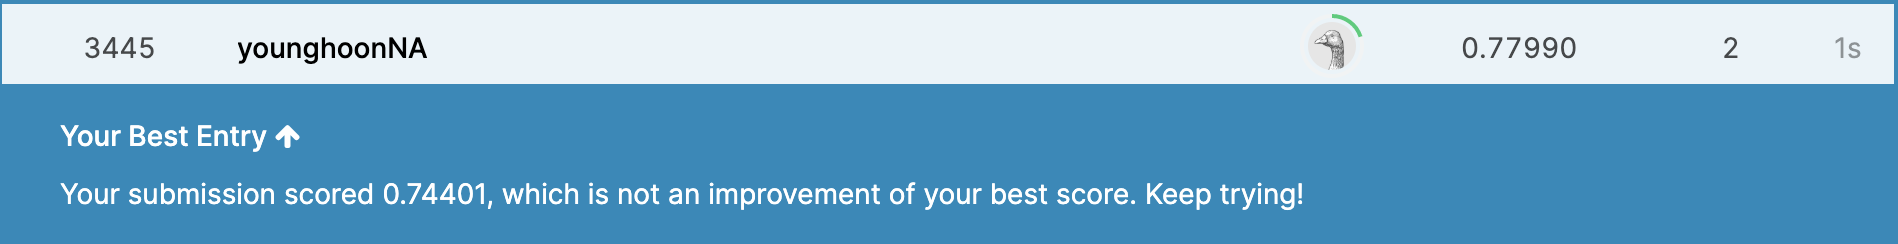

#### **2. 의사결정트리(Decision Tree)**

In [130]:
## 코드 작성

#초기에 data.table 과 함께 선언한 라이브러리 -> data.table + tidyverse
#로지스틱 회기분석에서 다운 받은 packages -> install.packages(c("caret", "e1071", "Hmisc"))
# 따라서 중복 설치 방지 -> 시간 늘어남. 3개 다운받는데 5분씩 걸림.
# install.packages(c("tidyverse", "data.table", "caret", "e1071"))

install.packages(c("rpart"))
# 이미 설치한 라이브러리
# library(tidyverse)
# library(data.table)
# library(caret)
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### 데이터 전처리

In [131]:
#데이터 구조 확인
train %>% str()
train %>% summary()

tibble [891 × 12] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [132]:
#로지스틱 회기분석과 동일하게 범주형 데이터 처리 및 필요없는 데이터 제거.

#범주형 데이터 확인.
train$Survived %>% unique()
train$Pclass %>% unique()
train$Sex %>% unique()
#ticket 데이터가 너무 많아 head(30) 을 통해 30개만 보여줌. 
train$Ticket %>% unique() %>% head(30)
train$Embarked %>% unique()

#필요없는 문자형 데이터 제거 -> 필요한 문자형 데이터인 Embarked는 범주형으로 전환
#PassengerId -> 그냥 1부터 순차적으로 증가해서 승객 수까지 증가. 필요 없음
#이름 -> 문자형 데이터 필요없음.
#cabin -> 선실번호 -> 범주형 데이터인 Embarked와 pClass 사용할꺼니까 필요 없다고 생각이 되서 제거.
#Ticket -> 찍어보면 알겠지만 너무 다양함. 필요 없음.
train_DF <- select(train, -PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Survived","Sex","Embarked"), factor)

#필요없는 속성 제거한 데이터는 Train_DF
summary(train_DF)

[1] 0 1

[1] 3 1 2

[1] "male"   "female"

[1] "A/5 21171"        "PC 17599"         "STON/O2. 3101282" "113803"          
 [5] "373450"           "330877"           "17463"            "349909"          
 [9] "347742"           "237736"           "PP 9549"          "113783"          
[13] "A/5. 2151"        "347082"           "350406"           "248706"          
[17] "382652"           "244373"           "345763"           "2649"            
[21] "239865"           "248698"           "330923"           "113788"          
[25] "347077"           "2631"             "19950"            "330959"          
[29] "349216"           "PC 17601"

[1] "S" "C" "Q" ""

 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:20.12   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.70   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
                                       NA's   :177                    
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           
                                           

In [133]:
#str 함수를 통한 범주형 데이터 변환 확인.
train_DF %>% str()

tibble [891 × 8] (S3: tbl_df/tbl/data.frame)
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 


####처음에는 na.omit를 통해 결측값을 제거하였으나 모델의 정확도가 너무 떨어져 중간값을 넣는 것으로 수정하였습니다.!

In [134]:
#결측값이 존재하는 Age 속성에 대해 impute - median를 통해 NA값을 중간값으로 채움
library(Hmisc)
train_DF$Age <- impute(train_DF$Age, median)

# Train 데이터에는 Fare 속성에 Na값 존재하지않음.
# test_DF$Fare <- impute(test_DF$Fare, median)

summary(train_DF)


 177 values imputed to 28 



 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:22.00   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.36   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:35.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           

In [135]:
#아까 summary(train_DF) 에서 Age에 결측값이 나왔으므로 결측값 제거 필요.
#머신러닝에서 데이터의 NA값 발생시 중간값으로 채우는 것 보단 제거하는게 낫다고 배웠으므로 저는 제거를 하는 쪽을 선택했습니다.
#타이나티닉은 데이터 수가 부족하다고 하셨으므로 대신 밑에서 테스트 데이터의 비율을 늘리겠습니다.

# -> 정확도가 너무 떨어져서 결측값에 중앙값 채우는 걸로 변경하였습니다. 
#train / test 비율을 0.95까지늘렸는데 결과가 너무 좋지 않았습니다.  -> 다시 9대 1로 변경.

# 혹시 모르니 다시 한번 결측값이 존재한다면 제거.
train_DF <- train_DF %>% na.omit()
summary(train_DF)



 177 values imputed to 28 



 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:22.00   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.36   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:35.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           

#### 다시 test train set 분리

In [136]:
#train / test 셋 분리

set.seed(31)
# 11주차 강의에서 타이타닉 데이터가 별로 없어서 test : train 비율을 9:1로 나누셨다고 하셨던걸로 기억합니다.
# 케글 데이터의 수치를 올리기 위해서는 모델이 더 잘 만들어져야 생각합니다. 또한 test 데이터가 또 존재하므로 0.95까지 비율을 증가시켰습니다.

# -> 0.95 너무 적은 test데이터 오차 확인 할 때 별 차이가 안남 -> 원래대로 9:1로 나누기
index <- caret::createDataPartition(y = train_DF$Survived, p = 0.90, list = FALSE)
train_decision <- train_DF[index, ]
test_decision <- train_DF[-index, ]

train_decision %>% show()
test_decision %>% show()

# A tibble: 803 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>     <int> <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0             3 male   22           1     0  7.25 S       
 2 1             1 female 38           1     0 71.3  C       
 3 1             3 female 26           0     0  7.92 S       
 4 1             1 female 35           1     0 53.1  S       
 5 0             3 male   35           0     0  8.05 S       
 6 0             3 male   28           0     0  8.46 Q       
 7 0             1 male   54           0     0 51.9  S       
 8 0             3 male    2           3     1 21.1  S       
 9 1             3 female 27           0     2 11.1  S       
10 1             2 female 14           1     0 30.1  C       
# … with 793 more rows
# A tibble: 88 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>     <int> <fct>  <impute> <int> <int> <dbl> <fct>   
 1 1             2 male   34.0         0     0 13    S       
 2 0    

In [137]:
#rpart를 이용해 의사결정트리 모델 생성. formual = Survived 를 통해 반응변수는 Survived, 다른 속성들은 설명변수로 지정 , 0과 1로 분류 하기 때문에 method = class
Survived_detection <- rpart(formula = Survived ~ ., data = train_decision, method = "class")

In [138]:
# summary를 통해 의사결정트리 모델 확인.
summary(Survived_detection)

Call:
rpart(formula = Survived ~ ., data = train_decision, method = "class")
  n= 803 

          CP nsplit rel error    xerror       xstd
1 0.46103896      0 1.0000000 1.0000000 0.04473727
2 0.03084416      1 0.5389610 0.5389610 0.03725763
3 0.01623377      3 0.4772727 0.4837662 0.03576626
4 0.01461039      4 0.4610390 0.5000000 0.03622215
5 0.01000000      6 0.4318182 0.4805195 0.03567328

Variable importance
     Sex     Fare   Pclass      Age    Parch    SibSp Embarked 
      45       18       13       10        7        4        3 

Node number 1: 803 observations,    complexity param=0.461039
  predicted class=0  expected loss=0.3835616  P(node) =1
    class counts:   495   308
   probabilities: 0.616 0.384 
  left son=2 (515 obs) right son=3 (288 obs)
  Primary splits:
      Sex      splits as  RL,           improve=118.321300, (0 missing)
      Pclass   < 2.5      to the right, improve= 44.556040, (0 missing)
      Fare     < 52.2771  to the left,  improve= 36.415030, (0 missin

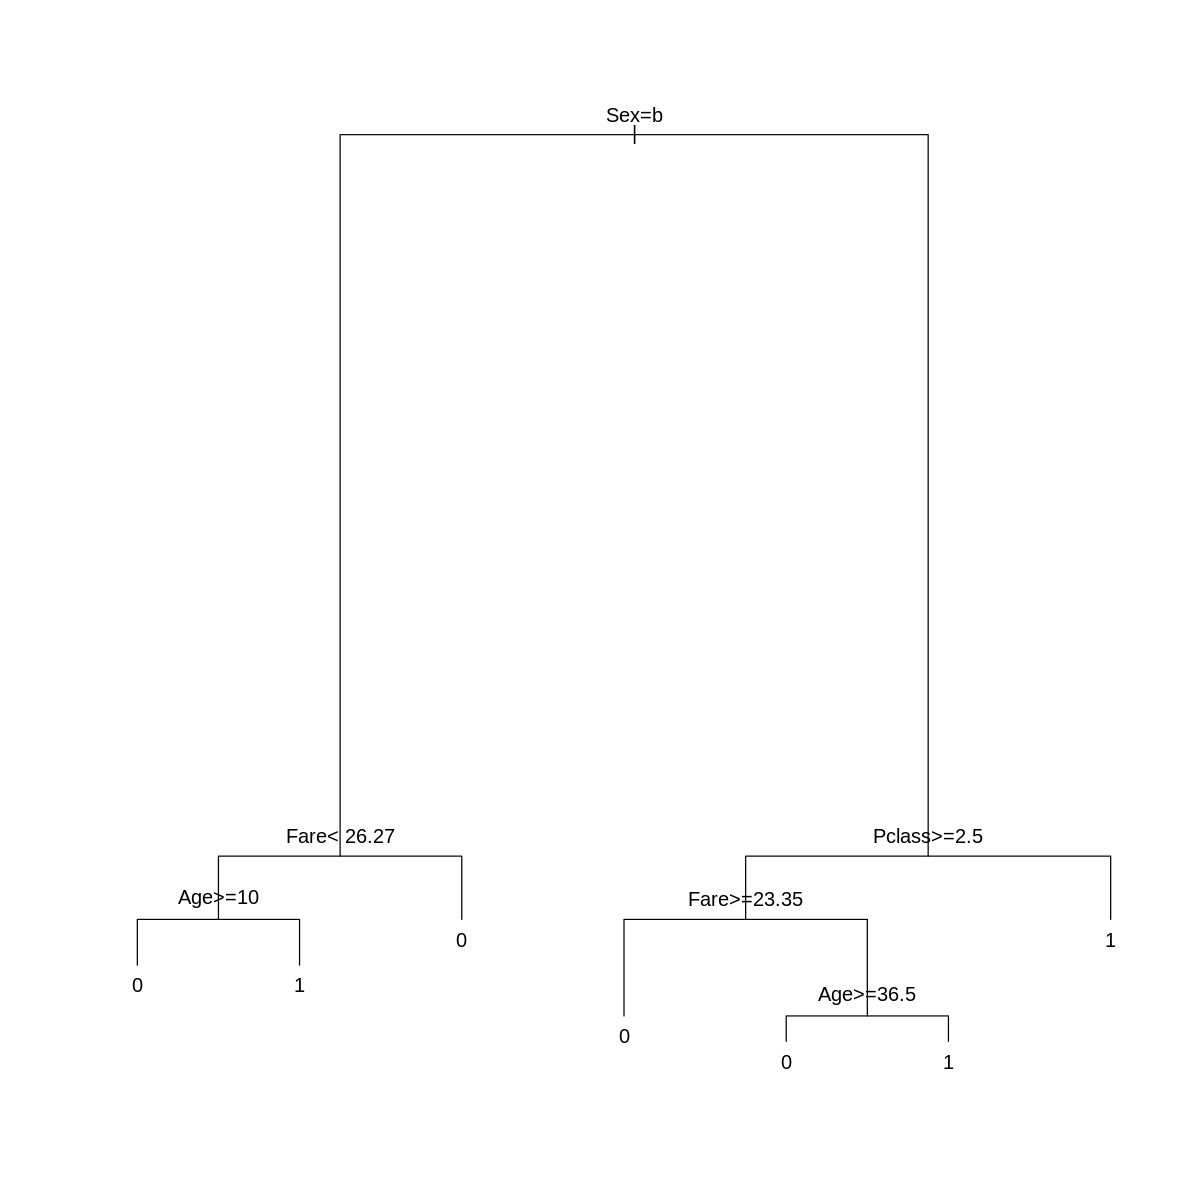

In [139]:
#Base R의 plot 함수를 통해 그리기 
plot(Survived_detection)
text(Survived_detection)

In [140]:
#의사결정 트리를 만드는데 부가적으로 필요한 packages 설치 및 library 선언.
install.packages(c("rattle","rpart.plot"))

library(rattle)
library(rpart.plot)
library(RColorBrewer)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



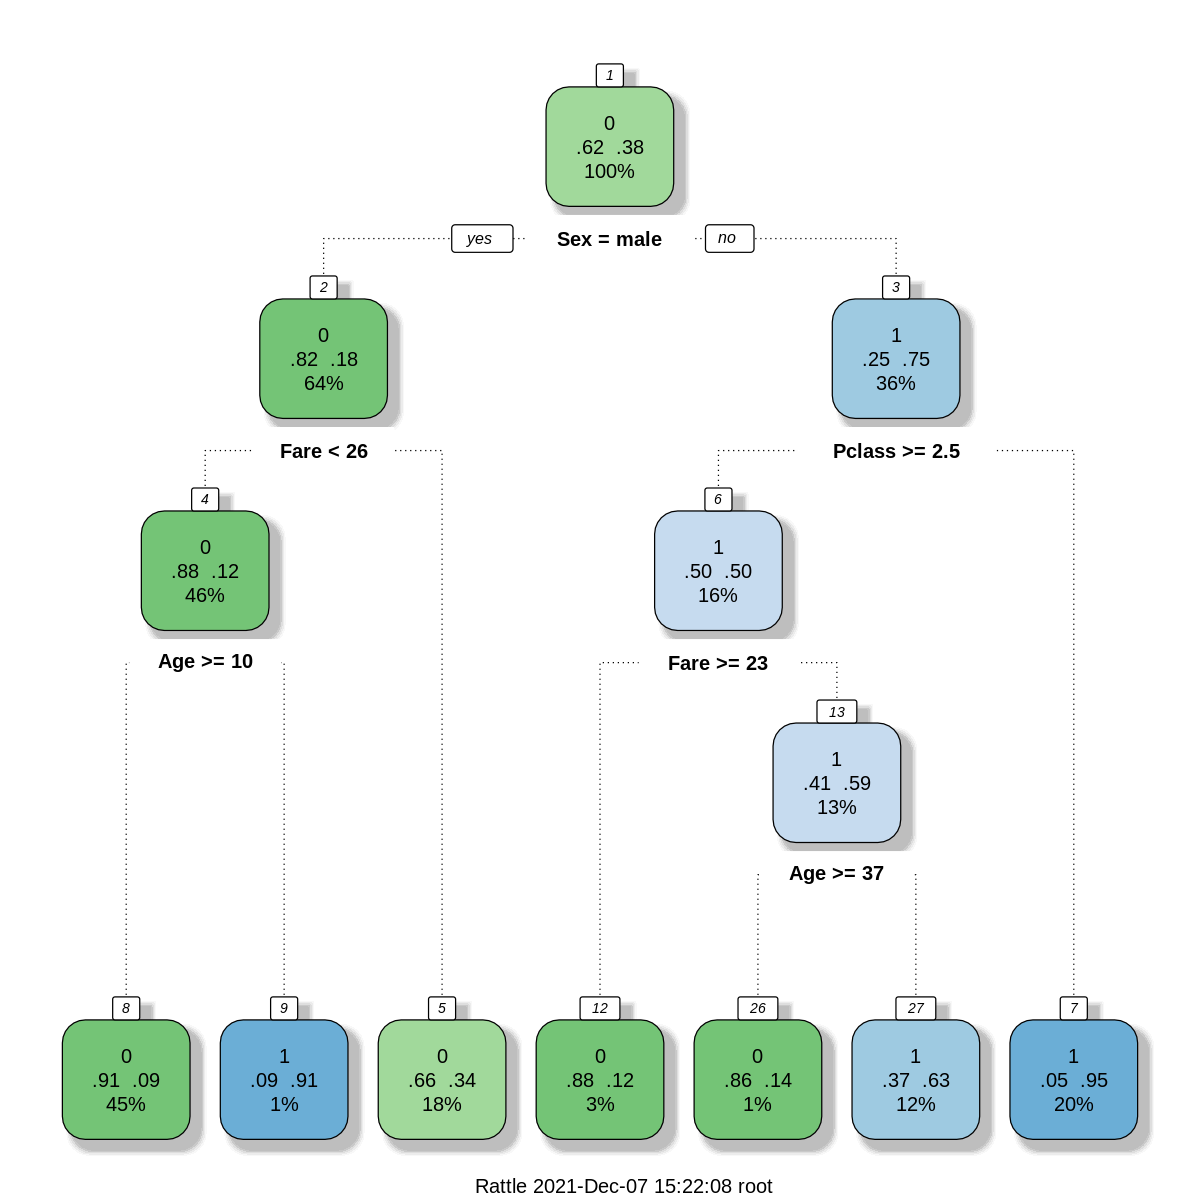

In [141]:
#libray(rpart)를 위에서 명시 해줬음에도 불구하고 다시 해주지 않으면 에러 발생하여 다시 집어넣었습니다.
#rpart의 fancyRpartPlot 을 통해 의사결정트리 시각화
library(rpart)
fancyRpartPlot(Survived_detection)

In [142]:
#rpart::printcp를 이용한 최적의 가지치기 값 확인 (pruning)
rpart::printcp(Survived_detection)


Classification tree:
rpart(formula = Survived ~ ., data = train_decision, method = "class")

Variables actually used in tree construction:
[1] Age    Fare   Pclass Sex   

Root node error: 308/803 = 0.38356

n= 803 

        CP nsplit rel error  xerror     xstd
1 0.461039      0   1.00000 1.00000 0.044737
2 0.030844      1   0.53896 0.53896 0.037258
3 0.016234      3   0.47727 0.48377 0.035766
4 0.014610      4   0.46104 0.50000 0.036222
5 0.010000      6   0.43182 0.48052 0.035673


In [143]:
# xerror가 최솟값이 되는 CP 선택 
Survived_detection$cptable %>% as_tibble() %>%
  filter(xerror == min(xerror))

min_xerror_cp <- Survived_detection$cptable %>% as_tibble() %>%
  filter(xerror == min(xerror)) %>% pull(CP)

CP,nsplit,rel error,xerror,xstd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01,6,0.4318182,0.4805195,0.03567328


In [144]:
# 최솟값이 되는 CP
min_xerror_cp

[1] 0.01

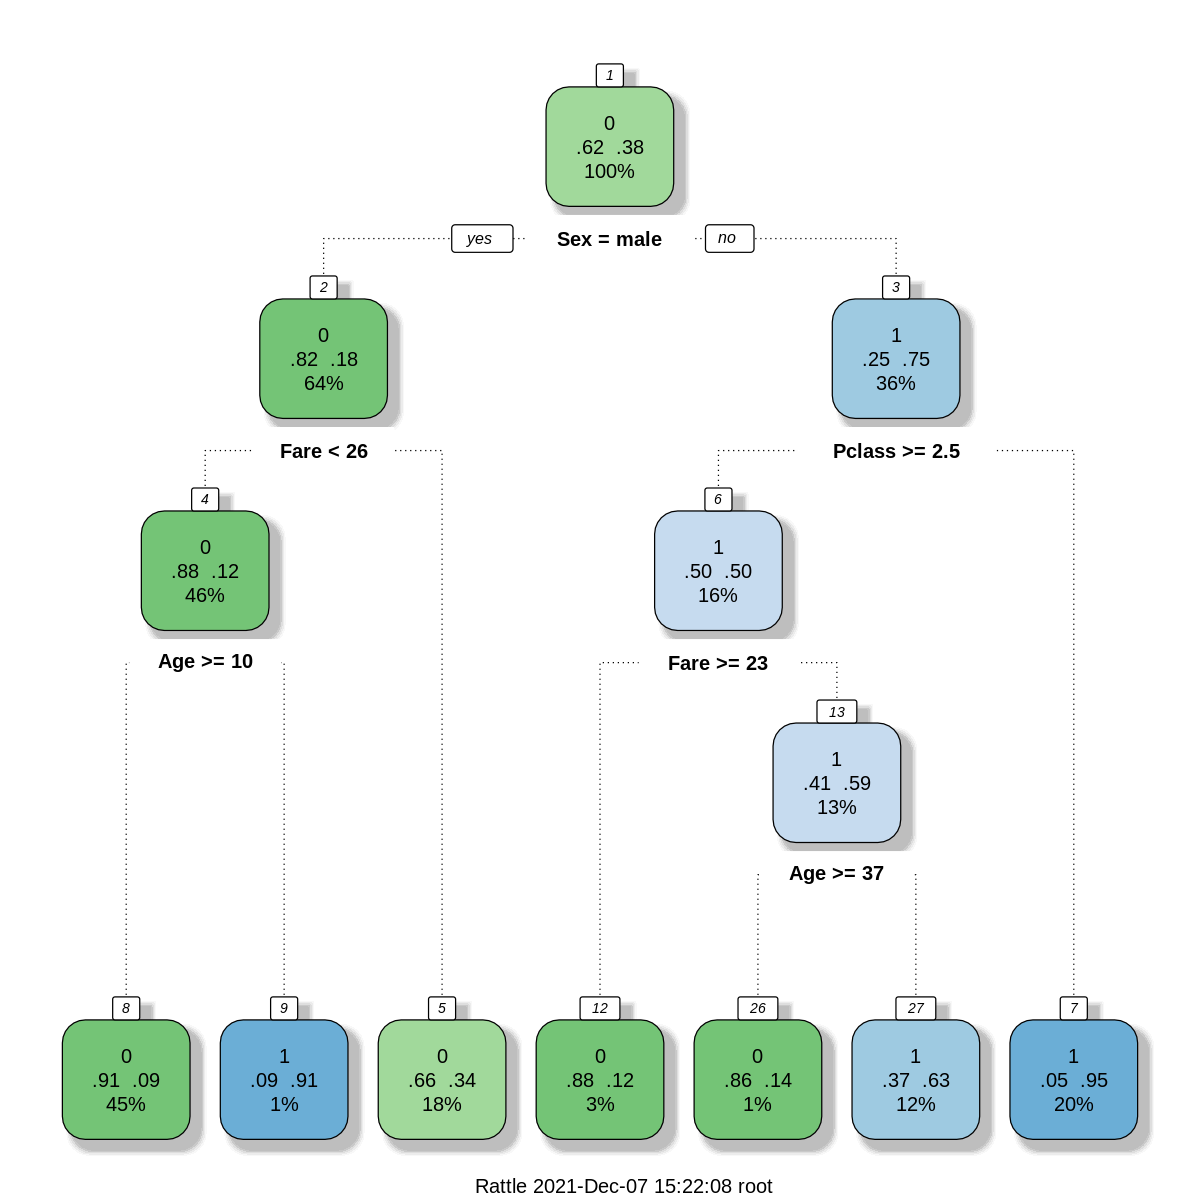

In [145]:
#rpart::prune을 통한 가지치기 
Survived_detection_pr <- rpart::prune(Survived_detection, cp = min_xerror_cp)

fancyRpartPlot(Survived_detection_pr)

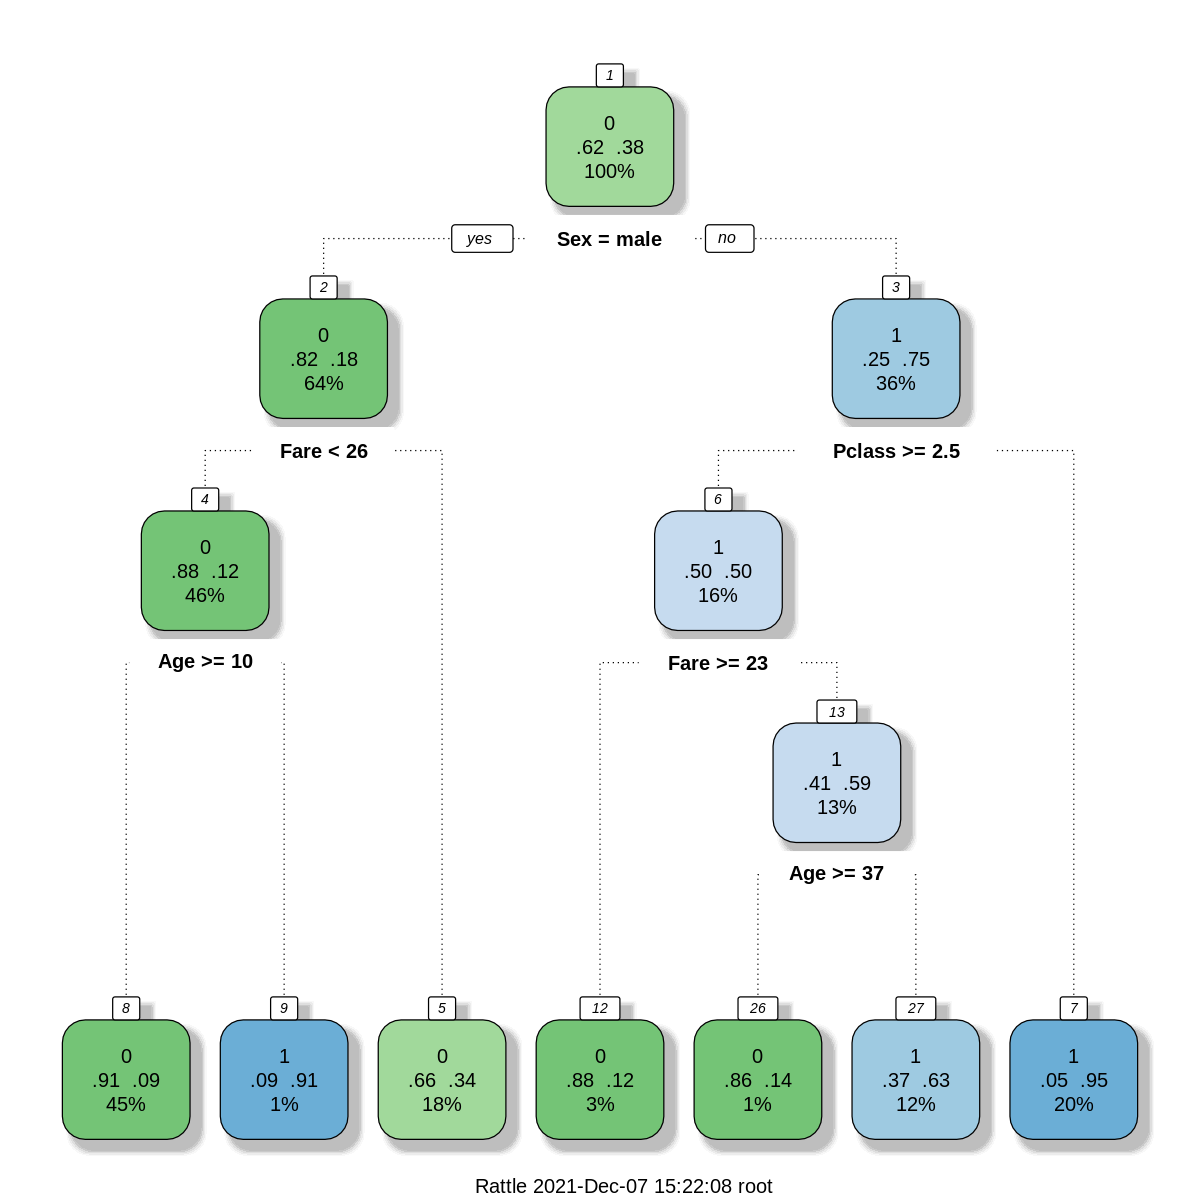

In [146]:
#이전 그림과 비교
fancyRpartPlot(Survived_detection)

* **test를 이용한 예측 및 평가**

In [147]:
#위에서 만든 모델로 test모델 예측.
predict_value_decision_tree <- predict(Survived_detection_pr, test_decision, type = "class") %>% 
 tibble(predict_value_decision_tree = .)
predict_value_decision_tree %>% show()

# A tibble: 88 × 1
   predict_value_decision_tree
   <fct>                      
 1 0                          
 2 0                          
 3 0                          
 4 0                          
 5 0                          
 6 0                          
 7 0                          
 8 1                          
 9 0                          
10 0                          
# … with 78 more rows


In [148]:
#실제 값과 의사결정트리를 통해 예측한 Survived 결과 확인.
predict_check_decision <- test_decision %>% select(Survived) %>% dplyr::bind_cols(., predict_value_decision_tree) 
predict_check_decision %>% show()

# A tibble: 88 × 2
   Survived predict_value_decision_tree
   <fct>    <fct>                      
 1 1        0                          
 2 0        0                          
 3 0        0                          
 4 0        0                          
 5 1        0                          
 6 0        0                          
 7 1        0                          
 8 0        1                          
 9 0        0                          
10 0        0                          
# … with 78 more rows


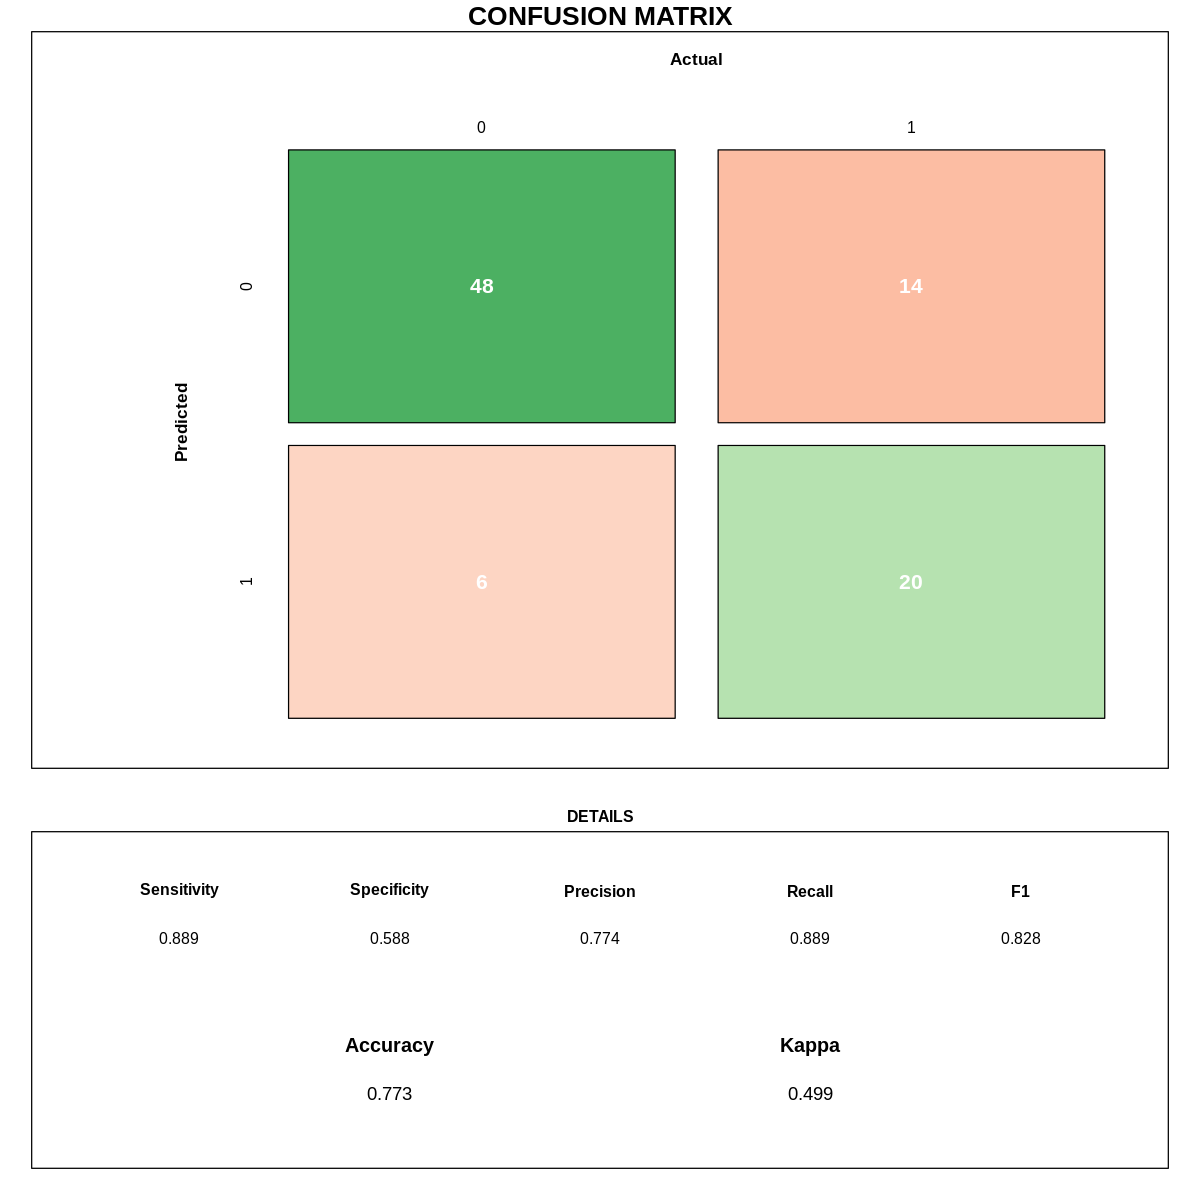

In [149]:
# draw_confusion_matrix를 이용한 시각화.
cm <- caret::confusionMatrix(predict_value_decision_tree$predict_value_decision_tree, test_decision$Survived)
draw_confusion_matrix(cm)

#### 케글 데이터를 이용한 테스트.

In [150]:
str(test)
#보니까 survived 빼고는 비슷함. 전처리 과정은 위와 똑같이 진행해야함.

tibble [418 × 11] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:418] 892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int [1:418] 3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr [1:418] "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr [1:418] "male" "female" "male" "male" ...
 $ Age        : num [1:418] 34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int [1:418] 0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int [1:418] 0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr [1:418] "330911" "363272" "240276" "315154" ...
 $ Fare       : num [1:418] 7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr [1:418] "" "" "" "" ...
 $ Embarked   : chr [1:418] "Q" "S" "Q" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [151]:
#위의 코드와 똑같이 진행. but Survived 빠졌으므로 mutate_at에는 Survived 없움.
test_DF <- select(test, -PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Sex","Embarked"), factor)

In [152]:
#필요없는 속성 제거한 데이터는 Test_DF
summary(test_DF)

     Pclass          Sex           Age            SibSp            Parch       
 Min.   :1.000   female:152   Min.   : 0.17   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   male  :266   1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :3.000                Median :27.00   Median :0.0000   Median :0.0000  
 Mean   :2.266                Mean   :30.27   Mean   :0.4474   Mean   :0.3923  
 3rd Qu.:3.000                3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :3.000                Max.   :76.00   Max.   :8.0000   Max.   :9.0000  
                              NA's   :86                                       
      Fare         Embarked
 Min.   :  0.000   C:102   
 1st Qu.:  7.896   Q: 46   
 Median : 14.454   S:270   
 Mean   : 35.627           
 3rd Qu.: 31.500           
 Max.   :512.329           
 NA's   :1                 

In [153]:
#결측값이 존재하는 Age 속성에 대해 impute - median를 통해 NA값을 중간값으로 채움
library(Hmisc)
test_DF$Age <- impute(test_DF$Age, median)

# Test 데이터에는 Fare 속성에 Na값 존재.
test_DF$Fare <- impute(test_DF$Fare, median)

summary(test_DF)


 86 values imputed to 27 


 1 values imputed to 14.4542 



     Pclass          Sex           Age            SibSp            Parch       
 Min.   :1.000   female:152   Min.   : 0.17   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   male  :266   1st Qu.:23.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :3.000                Median :27.00   Median :0.0000   Median :0.0000  
 Mean   :2.266                Mean   :29.60   Mean   :0.4474   Mean   :0.3923  
 3rd Qu.:3.000                3rd Qu.:35.75   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :3.000                Max.   :76.00   Max.   :8.0000   Max.   :9.0000  
      Fare         Embarked
 Min.   :  0.000   C:102   
 1st Qu.:  7.896   Q: 46   
 Median : 14.454   S:270   
 Mean   : 35.577           
 3rd Qu.: 31.472           
 Max.   :512.329           

In [154]:
#아까 summary(train_DF) 에서 Age 및 Fare에 결측값이 나왔으므로 결측값 제거 필요.

# 혹시 모르니 다시 한번 결측값이 존재한다면 제거.
test_DF <- test_DF %>% na.omit()
summary(test_DF)


 86 values imputed to 27 


 1 values imputed to 14.4542 



     Pclass          Sex           Age            SibSp            Parch       
 Min.   :1.000   female:152   Min.   : 0.17   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   male  :266   1st Qu.:23.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :3.000                Median :27.00   Median :0.0000   Median :0.0000  
 Mean   :2.266                Mean   :29.60   Mean   :0.4474   Mean   :0.3923  
 3rd Qu.:3.000                3rd Qu.:35.75   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :3.000                Max.   :76.00   Max.   :8.0000   Max.   :9.0000  
      Fare         Embarked
 Min.   :  0.000   C:102   
 1st Qu.:  7.896   Q: 46   
 Median : 14.454   S:270   
 Mean   : 35.577           
 3rd Qu.: 31.472           
 Max.   :512.329           

In [155]:
#위에서 만들고 가지치기까지 완료한 모델을 가지고 Kaggle 데이터 예측
#Data는 Kaggle에서 제공하는 test 데이터

predict_kaggle_decision_tree <- predict(Survived_detection_pr, test_DF, type = "class") %>% 
 tibble(predict_kaggle_decision_tree = .)
predict_kaggle_decision_tree %>% show()

# A tibble: 418 × 1
   predict_kaggle_decision_tree
   <fct>                       
 1 0                           
 2 0                           
 3 0                           
 4 0                           
 5 1                           
 6 0                           
 7 1                           
 8 0                           
 9 1                           
10 0                           
# … with 408 more rows


In [172]:
#predict를 통해 위에서 만든 모델로 케글 데이터 예측 후, 
# test의 PassengerID와 합쳐서 새로운 데이터 프레임을 만듭니다.
# 그 다음 write_csv를 통해 csv저장
predict_Dec_kaggle <- predict(Survived_detection_pr, test_DF, type = "class") %>% tibble(Survived = .)
submission_Decision_Tree <- test %>% select(PassengerId) %>% dplyr::bind_cols(., predict_Dec_kaggle) %>% write_csv(path = "submission_dec.csv")

의사결정트리 전 svm 모델을 먼저 올려 결과가 업데이트 되지 않았습니다.
의사결정트리의 score는 0.77511입니다.

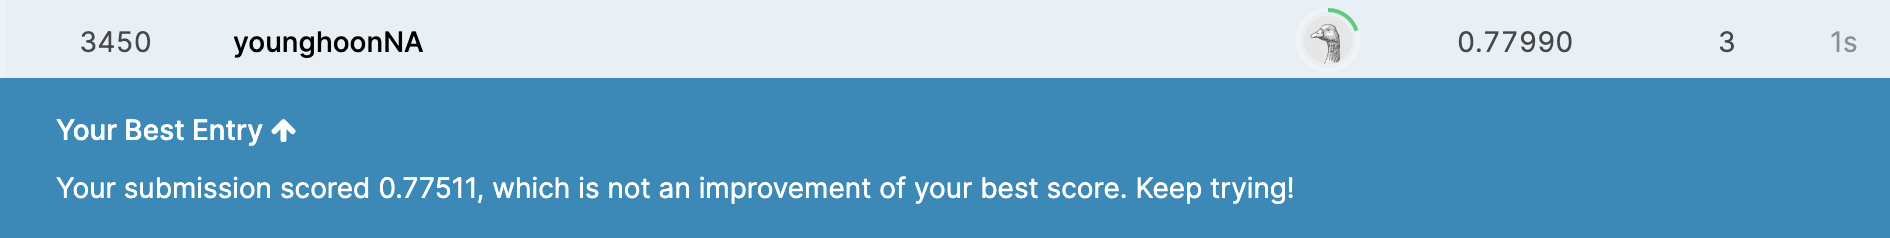

#### **3. 랜덤포레스트(Randomforest)**

In [59]:
#설치해야할 패키지 중 위에서 설치한 패키지 제외하고 설치

#초기에 data.table 과 함께 선언한 라이브러리 -> install.packages(c("tidyverse", "data.table"))
#로지스틱 회기분석에서 다운 받은 packages -> install.packages(c("caret", "e1071", "Hmisc"))
#의사결정 트리 -> install.packages(c("rpart"))

#따라서 install.packages(c("tidyverse", "caret", "e1071", "ipred","randomForest")) 중에서 
install.packages(c("ipred","randomForest"))
#만 설치

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [61]:
#str을 통해 데이터의 속성 및 데이터 타입 확인.
#범주형 데이터가 아니면 범주형 데이터로 바꿔주는 과정을 위해선 필요.
train %>% str()

#summary를 통한 결측값, 그리고 범주형 데아터 확인.
train %>% summary()

tibble [891 × 12] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [62]:
#범주형 데이터 확인.
train$Survived %>% unique()
train$Pclass %>% unique()
train$Sex %>% unique() 
#티켓이 너무 많아서 30개만 출력 
train$Ticket %>% unique() %>% head(30)
train$Embarked %>% unique()

#필요없는 문자형 데이터 제거 -> 필요한 문자형 데이터인 Embarked는 범주형으로 전환
#PassengerId -> 그냥 1부터 순차적으로 증가해서 승객 수까지 증가. 필요 없음
#이름 -> 문자형 데이터 필요없음.
#cabin -> 선실번호 -> 범주형 데이터인 Embarked와 pClass 사용할꺼니까 필요 없다고 생각이 되서 제거.
#Ticket -> 찍어보면 알겠지만 너무 다양함. 필요 없음.
train_DF <- select(train, -PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Survived","Sex","Embarked"), factor)

#필요없는 속성 제거한 데이터는 Train_DF
summary(train_DF)

[1] 0 1

[1] 3 1 2

[1] "male"   "female"

[1] "A/5 21171"        "PC 17599"         "STON/O2. 3101282" "113803"          
 [5] "373450"           "330877"           "17463"            "349909"          
 [9] "347742"           "237736"           "PP 9549"          "113783"          
[13] "A/5. 2151"        "347082"           "350406"           "248706"          
[17] "382652"           "244373"           "345763"           "2649"            
[21] "239865"           "248698"           "330923"           "113788"          
[25] "347077"           "2631"             "19950"            "330959"          
[29] "349216"           "PC 17601"

[1] "S" "C" "Q" ""

 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:20.12   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.70   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
                                       NA's   :177                    
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           
                                           

In [63]:
#str 함수를 통한 범주형 데이터 변환 확인.
train_DF %>% str()

tibble [891 × 8] (S3: tbl_df/tbl/data.frame)
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 


####처음에는 na.omit를 통해 결측값을 제거하였으나 모델의 정확도가 너무 떨어져 중간값을 넣는 것으로 수정하였습니다.!

In [173]:
#결측값이 존재하는 Age 속성에 대해 impute - median를 통해 NA값을 중간값으로 채움
library(Hmisc)
train_DF$Age <- impute(train_DF$Age, median)

# Train 데이터에는 Fare 속성에 Na값 존재하지않음.
# test_DF$Fare <- impute(test_DF$Fare, median)

summary(train_DF)


 177 values imputed to 28 



 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:22.00   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.36   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:35.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           

In [174]:
#아까 summary(train_DF) 에서 Age에 결측값이 나왔으므로 결측값 제거 필요.
#머신러닝에서 데이터의 NA값 발생시 중간값으로 채우는 것 보단 제거하는게 낫다고 배웠으므로 저는 제거를 하는 쪽을 선택했습니다.
#타이나티닉은 데이터 수가 부족하다고 하셨으므로 대신 밑에서 테스트 데이터의 비율을 늘리겠습니다.

# -> 정확도가 너무 떨어져서 결측값에 중앙값 채우는 걸로 변경하였습니다. 
#train / test 비율을 0.95까지늘렸는데 결과가 너무 좋지 않았습니다. 
# test데이터로 오차 측정할 때   -> 다시 9대 1로 변경.

# 혹시 모르니 다시 한번 결측값이 존재한다면 제거.
train_DF <- train_DF %>% na.omit()
summary(train_DF)



 177 values imputed to 28 



 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:22.00   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.36   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:35.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           

In [65]:
#train / test 셋 분리
set.seed(31)

# 11주차 강의에서 타이타닉 데이터가 별로 없어서 test : train 비율을 9:1로 나누셨다고 하셨던걸로 기억합니다.
# 케글 데이터의 수치를 올리기 위해서는 모델이 더 잘 만들어져야 생각합니다. 또한 test 데이터가 또 존재하므로 0.95까지 비율을 증가시켰습니다.
index <- caret::createDataPartition(y = train_DF$Survived, p = 0.95, list = FALSE)
train_RandomForest <- train_DF[index, ]
test_RandomForest <- train_DF[-index, ]

train_RandomForest %>% show()
test_RandomForest %>% show()

# A tibble: 679 × 8
   Survived Pclass Sex      Age SibSp Parch  Fare Embarked
   <fct>     <int> <fct>  <dbl> <int> <int> <dbl> <fct>   
 1 0             3 male      22     1     0  7.25 S       
 2 1             1 female    38     1     0 71.3  C       
 3 1             3 female    26     0     0  7.92 S       
 4 1             1 female    35     1     0 53.1  S       
 5 0             3 male      35     0     0  8.05 S       
 6 0             1 male      54     0     0 51.9  S       
 7 0             3 male       2     3     1 21.1  S       
 8 1             3 female    27     0     2 11.1  S       
 9 1             2 female    14     1     0 30.1  C       
10 1             3 female     4     1     1 16.7  S       
# … with 669 more rows
# A tibble: 35 × 8
   Survived Pclass Sex      Age SibSp Parch   Fare Embarked
   <fct>     <int> <fct>  <dbl> <int> <int>  <dbl> <fct>   
 1 0             1 male      28     1     0  82.2  C       
 2 0             3 male      25     0     0   7.65

In [66]:
#rpart를 이용해 의사결정 트리 모델을 먼저 만들기. 방법은 위와 동일 formula = Survived로 반응변수 , 그 외 속성은 설명변수, method = class를 통해 분류
library(rpart)
Survived_detection_RandomForest <- rpart(formula = Survived ~ ., data = train_RandomForest, method = "class")

In [67]:
#xerror가 최소가 되는 CP 선택
min_xerror_cp <- Survived_detection_RandomForest$cptable %>% as_tibble() %>%
  filter(xerror == min(xerror)) %>% pull(CP)

In [68]:
#최소 CP
min_xerror_cp

[1] 0.01

In [69]:
#prune을 통한 가지치기
Survived_detection_RandomForest_prune <- rpart::prune(Survived_detection_RandomForest, cp = min_xerror_cp)

In [175]:
#가지치기까지 끝난 모델 생성 후, test 데이터를 이용한 평가
predict_value_RandomForest_prune <- predict(Survived_detection_RandomForest_prune, test_RandomForest, type = "class") %>% 
 tibble(predict_value_RandomForest_prune = .)

# test 데이터를 이용한 평가 및 원래 Survived 데이터를 이어붙여 비교
predict_check_RandomForest_prune <- test_RandomForest %>% select(Survived) %>% dplyr::bind_cols(., predict_value_RandomForest_prune) 

In [71]:
#위에서 이어붙인 데이터 보기
predict_check_RandomForest_prune %>% show()

# A tibble: 35 × 2
   Survived predict_value_RandomForest_prune
   <fct>    <fct>                           
 1 0        0                               
 2 0        0                               
 3 0        0                               
 4 0        0                               
 5 0        0                               
 6 0        0                               
 7 1        1                               
 8 1        1                               
 9 1        1                               
10 0        0                               
# … with 25 more rows


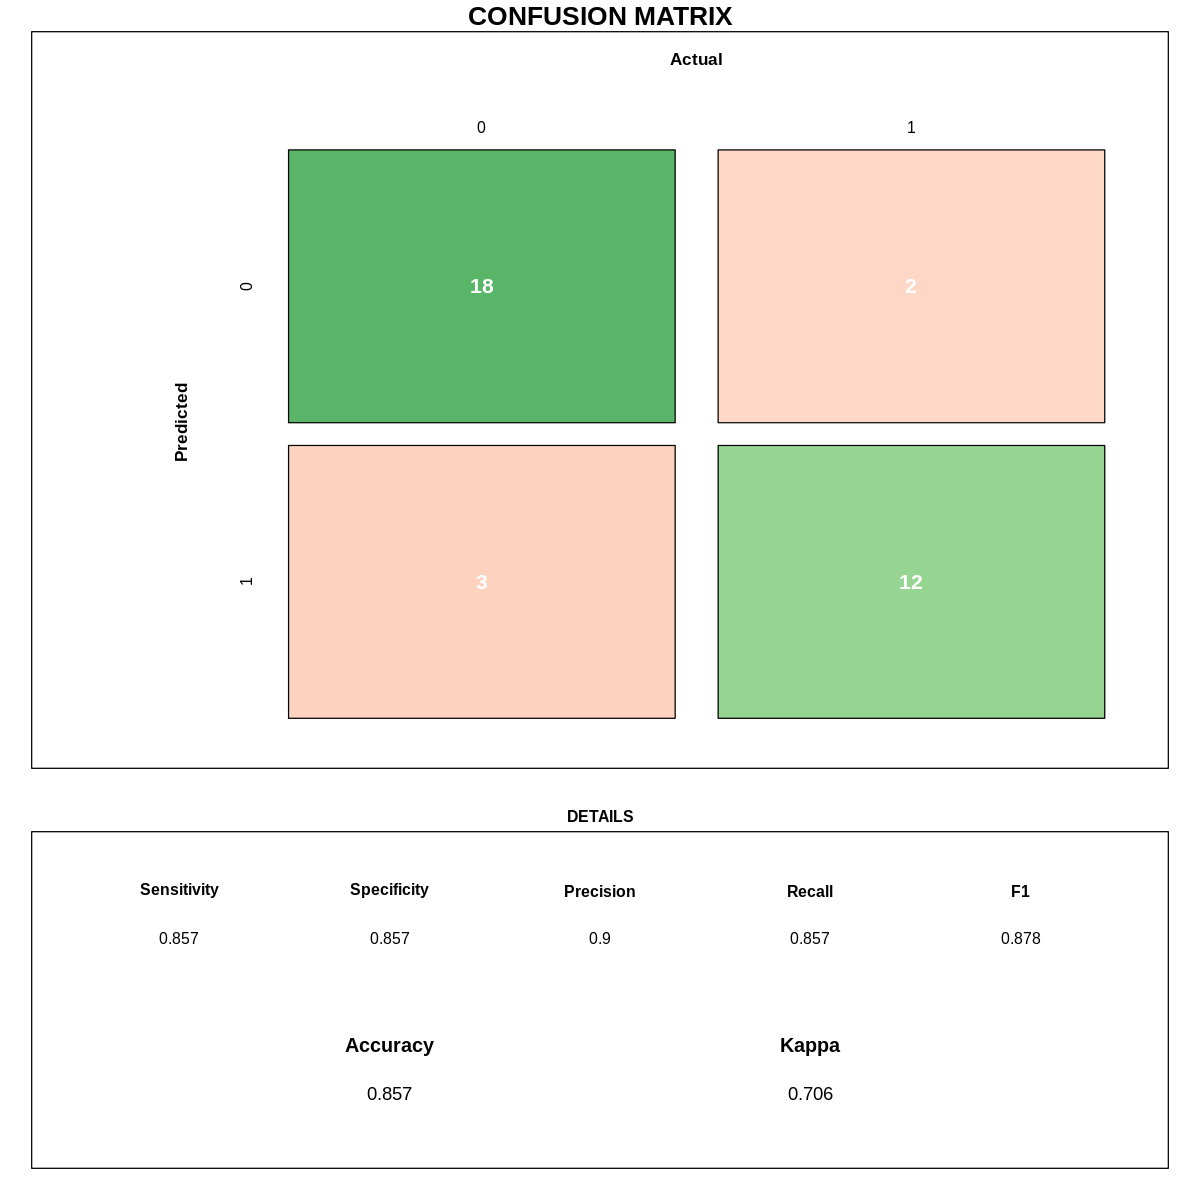

In [72]:
#draw_confusion_matrix를 이용해 ConfusionMatrix 시각화
cm <- caret::confusionMatrix(predict_value_RandomForest_prune$predict_value_RandomForest_prune, test_RandomForest$Survived)
draw_confusion_matrix(cm)

#### 배깅을 사용한 타이타닉 생존 예측

In [73]:
#배깅에 필요한 라이브러리 다운로드.

library(ipred)

#시드 넘버 66을 준 후, 배깅, nbagg를 통해 tree를 몇개 만들지 설정.
set.seed(66)
Survived_baggind <- ipred::bagging(Survived ~ ., data = train_RandomForest, nbagg = 100)

In [176]:
#위에서 만든 배깅 모델을 이용해 test데이터 예측 
predict_value_bagging <- predict(Survived_baggind, test_RandomForest, type = "class") %>% 
 tibble(predict_value_bagging = .)
predict_check_bagging <- test_RandomForest %>% select(Survived) %>% dplyr::bind_cols(., predict_value_bagging) 

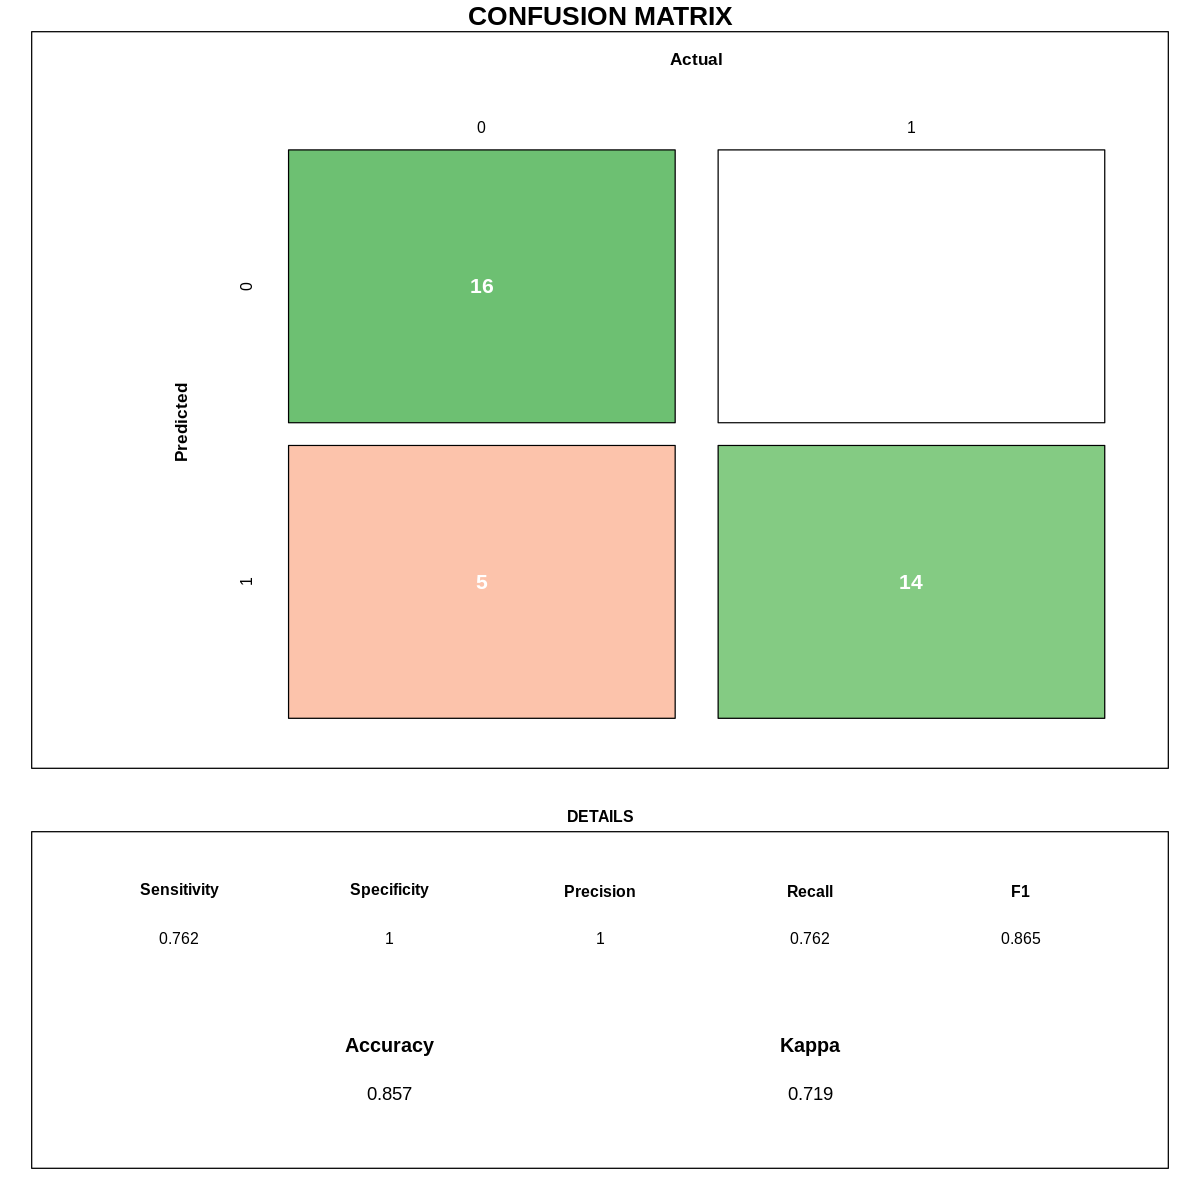

In [177]:
# 배깅 데이터 시각화
cm <- caret::confusionMatrix(predict_value_bagging$predict_value_bagging, test_RandomForest$Survived)
draw_confusion_matrix(cm)

#### RandomForest를 사용한 예측

In [76]:
#설명 변수도 무작위로 뽑는 RandomForest 사용하기 위해 라이브러리 선언.
library(randomForest)

#모델 만들기 전 train 데이터 요약
summary(train_RandomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:rattle’:

    importance


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




 Survived     Pclass          Sex           Age            SibSp       
 0:403    Min.   :1.000   female:246   Min.   : 0.67   Min.   :0.0000  
 1:276    1st Qu.:1.500   male  :433   1st Qu.:20.00   1st Qu.:0.0000  
          Median :3.000                Median :28.00   Median :0.0000  
          Mean   :2.252                Mean   :29.48   Mean   :0.5081  
          3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.0000  
          Max.   :3.000                Max.   :80.00   Max.   :5.0000  
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  8.05   C:121   
 Median :0.0000   Median : 15.25   Q: 25   
 Mean   :0.4227   Mean   : 32.61   S:531   
 3rd Qu.:1.0000   3rd Qu.: 31.33           
 Max.   :6.0000   Max.   :512.33           

In [77]:
# randomForest의 옵션 중 na.action = na.omit은 결측값을 사용하지 않을 때 사용. 
# 저는 위에서 결측값 처리를 해주었기 때문에 제외하였습니다.

#설명변수, 반응변수 지정 해주고, 모델을 만들어 줍니다. mtry = 몇개의 설명 변수 사용, ntree = nbagg와 동일
Survived_RF <- randomForest(Survived ~ ., data = train_RandomForest, importance = T, mtry = 7, ntree = 1000)
Survived_RF


Call:
 randomForest(formula = Survived ~ ., data = train_RandomForest,      importance = T, mtry = 7, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 7

        OOB estimate of  error rate: 20.18%
Confusion matrix:
    0   1 class.error
0 341  62   0.1538462
1  75 201   0.2717391

In [78]:
#mtry의 골든 스탠다드는 mtry에 sqrt를 적용한 수.
#mtry의 골든 스탠다드 = 3
mtry_sqrt <- train %>% select(-Survived) %>% colnames() %>%
 length() %>% sqrt() %>% floor()

mtry_sqrt

[1] 3

In [79]:
# mtry의 골든 스탠다드를 적용 후 error rate 감소를 볼 수 있습니다.
set.seed(52)
Survived_RF_mtry <- randomForest(Survived ~ ., data = train_RandomForest, importance = T, mtry = mtry_sqrt, ntree = 1000)
Survived_RF_mtry


Call:
 randomForest(formula = Survived ~ ., data = train_RandomForest,      importance = T, mtry = mtry_sqrt, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 18.26%
Confusion matrix:
    0   1 class.error
0 354  49   0.1215881
1  75 201   0.2717391

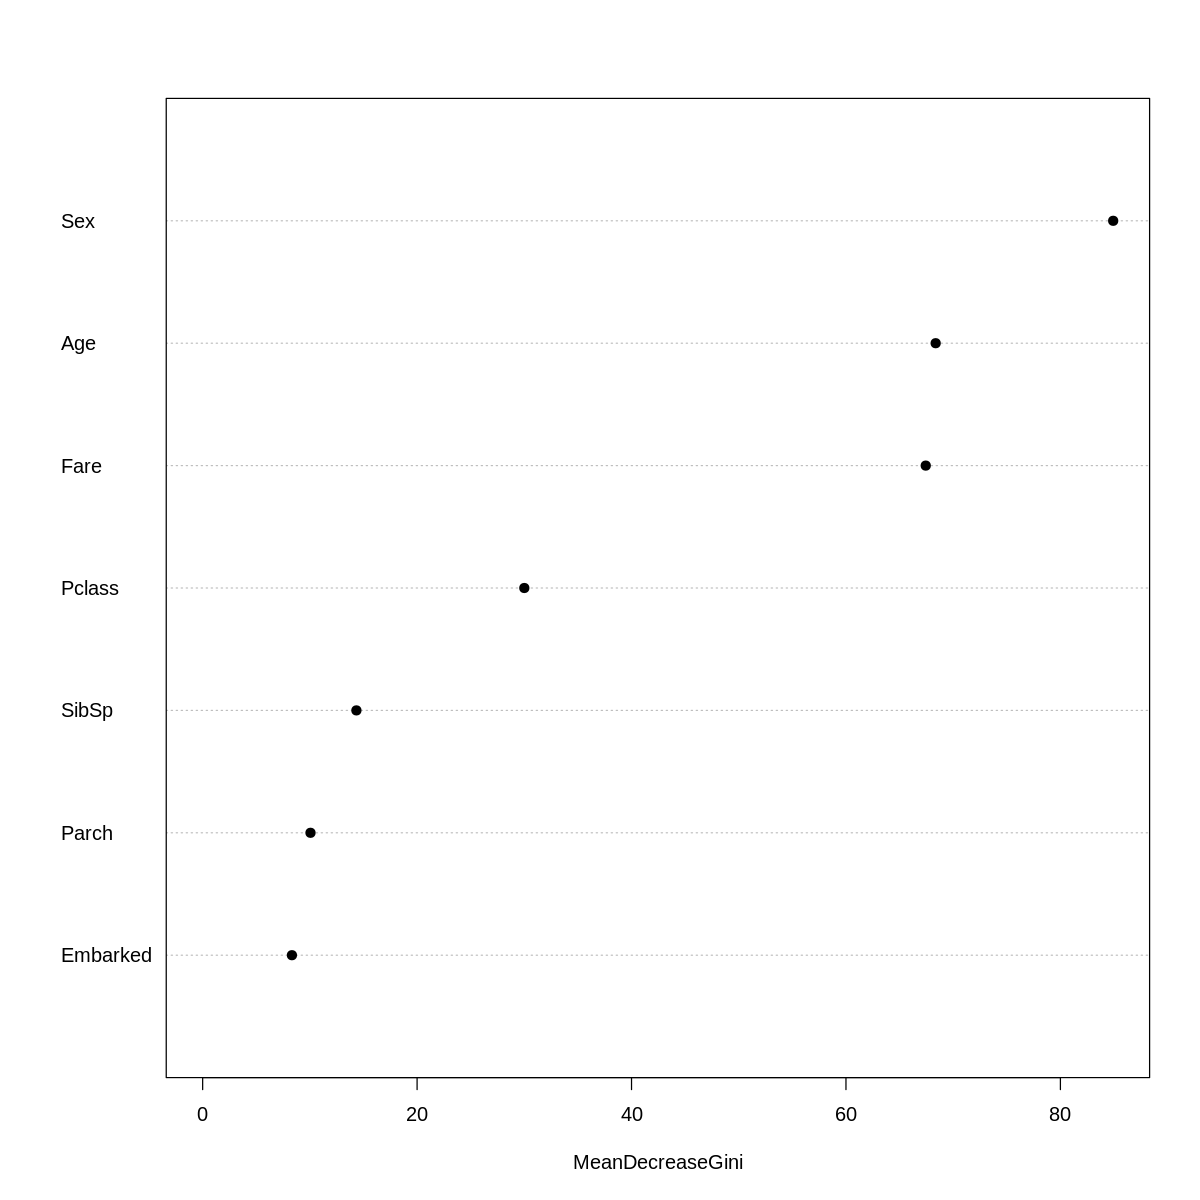

In [80]:
#설명변수의 중요도 확. 
#여기서는 Sex 성별, Age 나이 .. 순으로 중요도가 나오는 것을 볼 수 있습니다.
varImpPlot(Survived_RF_mtry, type=2, pch=19, col=1, cex=1, main="")

In [81]:
#test데이터를 이용한 예측 RandomForest 사용
predict_value_RF_mtry <- predict(Survived_RF_mtry, test_RandomForest, type = "class") %>% 
 tibble(predict_value_RF_mtry = .)
predict_check_RF_mtry <- test_RandomForest %>% select(Survived) %>% dplyr::bind_cols(., predict_value_RF_mtry) 

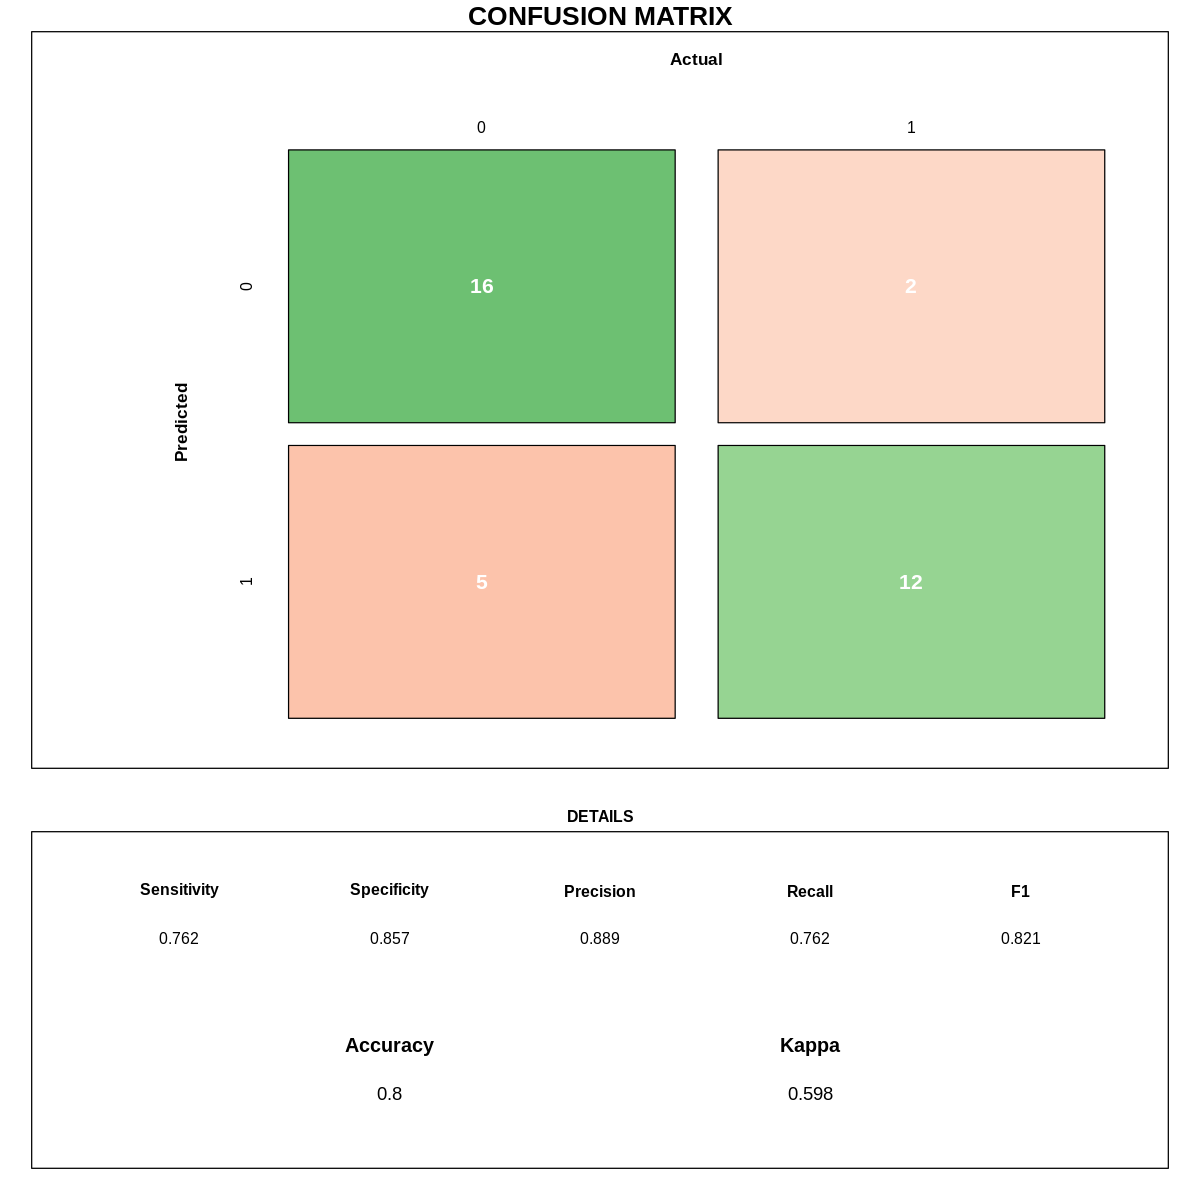

In [82]:
#confusion matrix 시각화
cm <- caret::confusionMatrix(predict_value_RF_mtry$predict_value_RF_mtry, test_RandomForest$Survived)
draw_confusion_matrix(cm)

#### 케글 데이터 처리.

In [83]:
#str을 통해 데이터의 속성 및 데이터 타입 확인.
#범주형 데이터가 아니면 범주형 데이터로 바꿔주는 과정을 위해선 필요.
test %>% str()

#summary를 통한 결측값, 그리고 범주형 데아터 확인.
test %>% summary()

tibble [418 × 11] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:418] 892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int [1:418] 3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr [1:418] "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr [1:418] "male" "female" "male" "male" ...
 $ Age        : num [1:418] 34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int [1:418] 0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int [1:418] 0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr [1:418] "330911" "363272" "240276" "315154" ...
 $ Fare       : num [1:418] 7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr [1:418] "" "" "" "" ...
 $ Embarked   : chr [1:418] "Q" "S" "Q" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :30.27   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

In [84]:
#범주형 데이터 확인.
test$Pclass %>% unique()
test$Sex %>% unique() 
#티켓은 너무 많으므로 앞의 30개만 보기
test$Ticket %>% unique() %>% head(30)
test$Embarked %>% unique()

#필요없는 문자형 데이터 제거 -> 필요한 문자형 데이터인 Embarked는 범주형으로 전환
#PassengerId -> 그냥 1부터 순차적으로 증가해서 승객 수까지 증가. 필요 없음
#이름 -> 문자형 데이터 필요없음.
#cabin -> 선실번호 -> 범주형 데이터인 Embarked와 pClass 사용할꺼니까 필요 없다고 생각이 되서 제거.
#Ticket -> 찍어보면 알겠지만 너무 다양함. 필요 없음.
test_DF_kaggle <- test %>% select(-PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Sex","Embarked"), factor)

#필요없는 속성 제거한 데이터는 Train_DF
summary(test_DF_kaggle)


[1] 3 2 1

[1] "male"   "female"

[1] "330911"           "363272"           "240276"           "315154"          
 [5] "3101298"          "7538"             "330972"           "248738"          
 [9] "2657"             "A/4 48871"        "349220"           "694"             
[13] "21228"            "24065"            "W.E.P. 5734"      "SC/PARIS 2167"   
[17] "233734"           "2692"             "STON/O2. 3101270" "2696"            
[21] "PC 17603"         "C 17368"          "PC 17598"         "PC 17597"        
[25] "PC 17608"         "A/5. 3337"        "113509"           "2698"            
[29] "113054"           "2662"

[1] "Q" "S" "C"

     Pclass          Sex           Age            SibSp            Parch       
 Min.   :1.000   female:152   Min.   : 0.17   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   male  :266   1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :3.000                Median :27.00   Median :0.0000   Median :0.0000  
 Mean   :2.266                Mean   :30.27   Mean   :0.4474   Mean   :0.3923  
 3rd Qu.:3.000                3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :3.000                Max.   :76.00   Max.   :8.0000   Max.   :9.0000  
                              NA's   :86                                       
      Fare         Embarked
 Min.   :  0.000   C:102   
 1st Qu.:  7.896   Q: 46   
 Median : 14.454   S:270   
 Mean   : 35.627           
 3rd Qu.: 31.500           
 Max.   :512.329           
 NA's   :1                 

In [85]:
#str 함수를 통한 범주형 데이터 변환 확인.
test_DF_kaggle %>% str()

tibble [418 × 7] (S3: tbl_df/tbl/data.frame)
 $ Pclass  : int [1:418] 3 3 2 3 3 3 3 2 3 3 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age     : num [1:418] 34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp   : int [1:418] 0 1 0 0 1 0 0 1 0 2 ...
 $ Parch   : int [1:418] 0 0 0 0 1 0 0 1 0 0 ...
 $ Fare    : num [1:418] 7.83 7 9.69 8.66 12.29 ...
 $ Embarked: Factor w/ 3 levels "C","Q","S": 2 3 2 3 3 3 2 3 1 3 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [178]:
#결측값이 존재하는 Age 속성에 대해 impute - median를 통해 NA값을 중간값으로 채움
library(Hmisc)
test_DF$Age <- impute(test_DF$Age, median)

# Test 데이터에는 Fare 속성에 Na값 존재.
test_DF$Fare <- impute(test_DF$Fare, median)

summary(test_DF)


 86 values imputed to 27 


 1 values imputed to 14.4542 



     Pclass          Sex           Age            SibSp            Parch       
 Min.   :1.000   female:152   Min.   : 0.17   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   male  :266   1st Qu.:23.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :3.000                Median :27.00   Median :0.0000   Median :0.0000  
 Mean   :2.266                Mean   :29.60   Mean   :0.4474   Mean   :0.3923  
 3rd Qu.:3.000                3rd Qu.:35.75   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :3.000                Max.   :76.00   Max.   :8.0000   Max.   :9.0000  
      Fare         Embarked
 Min.   :  0.000   C:102   
 1st Qu.:  7.896   Q: 46   
 Median : 14.454   S:270   
 Mean   : 35.577           
 3rd Qu.: 31.472           
 Max.   :512.329           

In [179]:
#아까 summary(train_DF) 에서 Age 및 Fare에 결측값이 나왔으므로 결측값 제거 필요.

# 혹시 모르니 다시 한번 결측값이 존재한다면 제거.
test_DF <- test_DF %>% na.omit()
summary(test_DF)


 86 values imputed to 27 


 1 values imputed to 14.4542 



     Pclass          Sex           Age            SibSp            Parch       
 Min.   :1.000   female:152   Min.   : 0.17   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   male  :266   1st Qu.:23.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :3.000                Median :27.00   Median :0.0000   Median :0.0000  
 Mean   :2.266                Mean   :29.60   Mean   :0.4474   Mean   :0.3923  
 3rd Qu.:3.000                3rd Qu.:35.75   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :3.000                Max.   :76.00   Max.   :8.0000   Max.   :9.0000  
      Fare         Embarked
 Min.   :  0.000   C:102   
 1st Qu.:  7.896   Q: 46   
 Median : 14.454   S:270   
 Mean   : 35.577           
 3rd Qu.: 31.472           
 Max.   :512.329           

#### <font color=red> 에러 발생 </font>

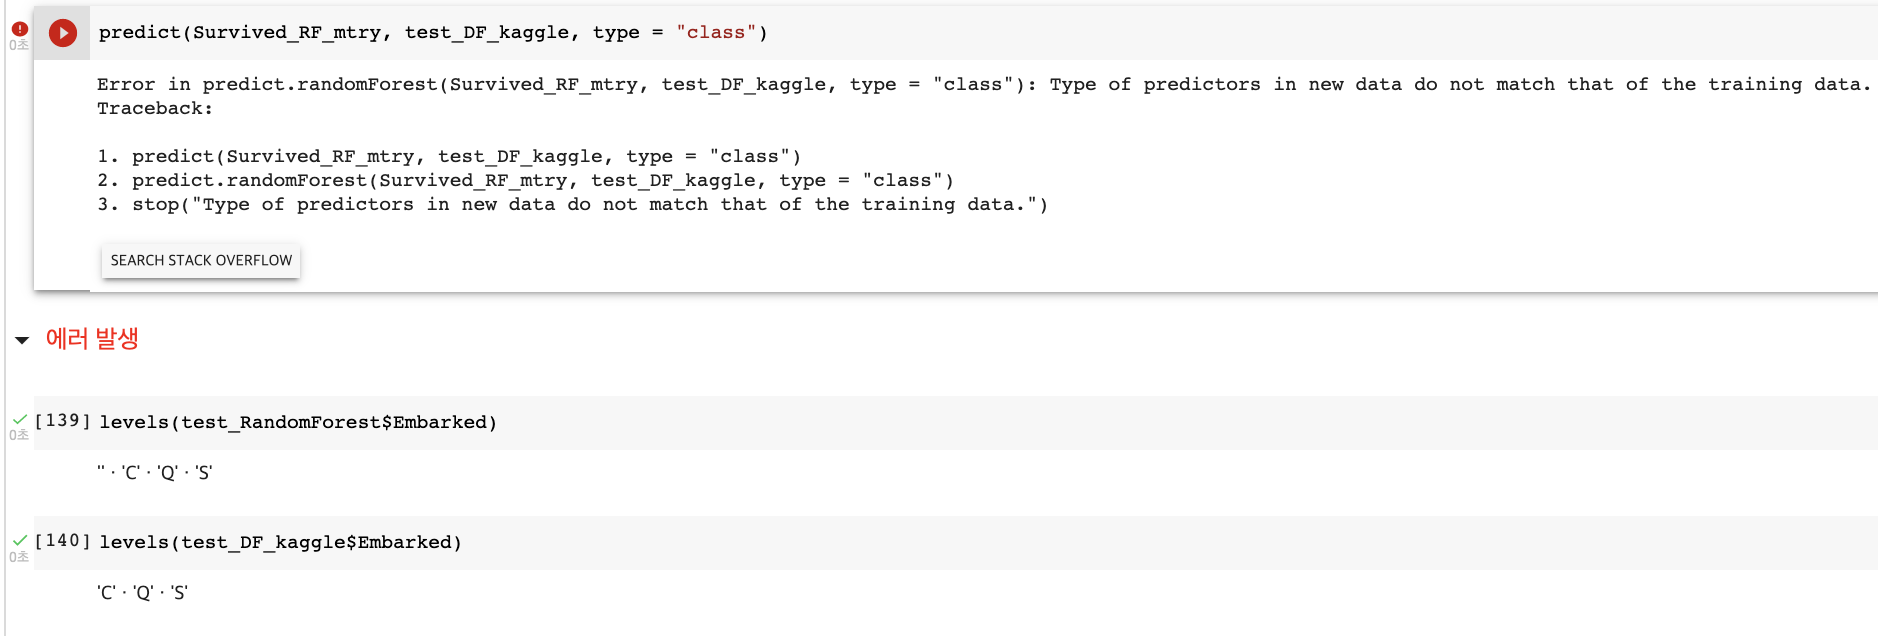

In [184]:
#test_RandomForest의 Embarked의 범주 확인
levels(test_RandomForest$Embarked)

[1] ""  "C" "Q" "S"

In [185]:
#test_DF_kaggle Embarked의 범주 확인
levels(test_DF_kaggle$Embarked)

[1] ""  "C" "Q" "S"

In [182]:
#type of predictors in new data do not match that of the training data.에러 발생 

#https://stackoverflow.com/questions/24829674/r-random-forest-error-type-of-predictors-in-new-data-do-not-match 참조하여 
#levels (테스트 데이터$속성) , levels (훈련 데이터$속성) 을 통해 모든 속성에 대해서 출력해본 결과
#Embarked 속성이 달랐다는 점을 알게되었고 다음과 같은 코드를 통해 해결 하였습니다. 
levels(test_DF_kaggle$Embarked) <- levels(test_RandomForest$Embarked)

In [183]:
#levels가 같은지 확인.
levels(test_RandomForest$Embarked)
levels(test_DF_kaggle$Embarked)

[1] ""  "C" "Q" "S"

[1] ""  "C" "Q" "S"

#### RandomForest 다시 케글 데이터 예측 

In [186]:
#mtry의 골든 스탠다드까지 적용한 모델을 통해 케글 데이터 예측.
predict_value_RF_kaggle <- predict(Survived_RF_mtry, test_DF_kaggle, type = "class") %>% 
 tibble(predict_value_RF = .)

In [187]:
#RandomForest 예측 결과 보기
predict_value_RF_kaggle %>% show() %>% head(10)

# A tibble: 331 × 1
   predict_value_RF
   <fct>           
 1 0               
 2 0               
 3 0               
 4 0               
 5 0               
 6 0               
 7 1               
 8 0               
 9 1               
10 0               
# … with 321 more rows


NULL

In [188]:
#RandomForest 모델을 통해 예측한 결과를 csv파일로 저장.
predict_RF_kaggle <- predict(Survived_RF_mtry, test_DF_svm, type = "class") %>% tibble(Survived = .)
submission_RF <- test %>% select(PassengerId) %>% dplyr::bind_cols(., predict_RF_kaggle) %>% write_csv(path = "submission_RF.csv")

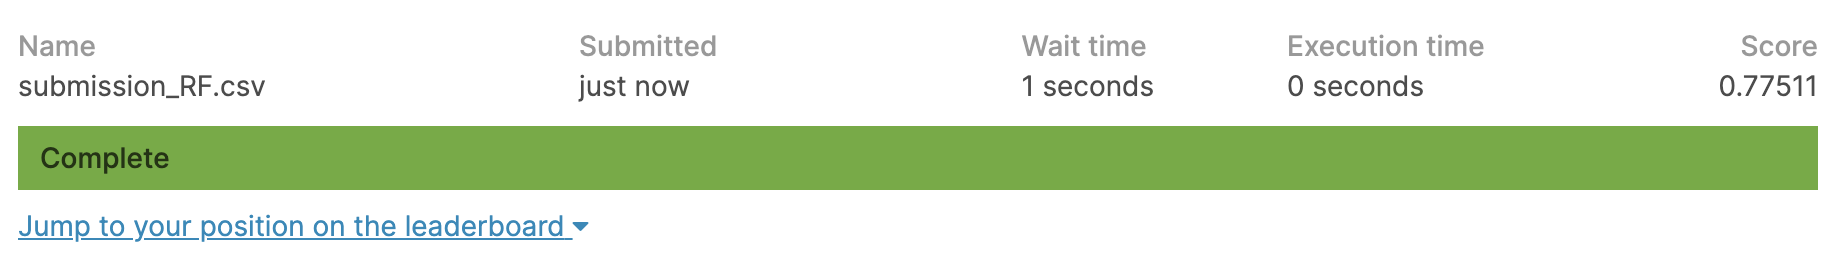

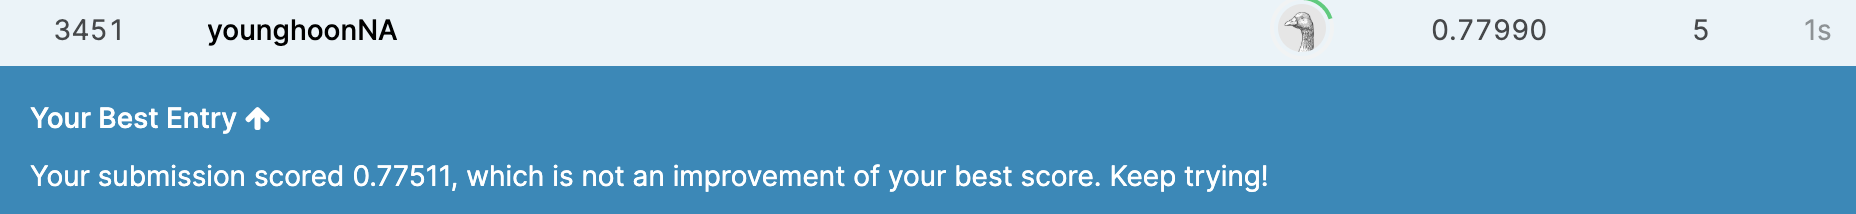

In [189]:
#Bagging을 사용한 모델도 결과가 좋아서 케글에 올려서 결과를 확인해 보겠습니다.
predict_Bagg_kaggle <- predict(Survived_baggind, test_DF_svm, type = "class") %>% tibble(Survived = .)
submission_RF <- test %>% select(PassengerId) %>% dplyr::bind_cols(., predict_Bagg_kaggle) %>% write_csv(path = "submission_Bagg.csv")

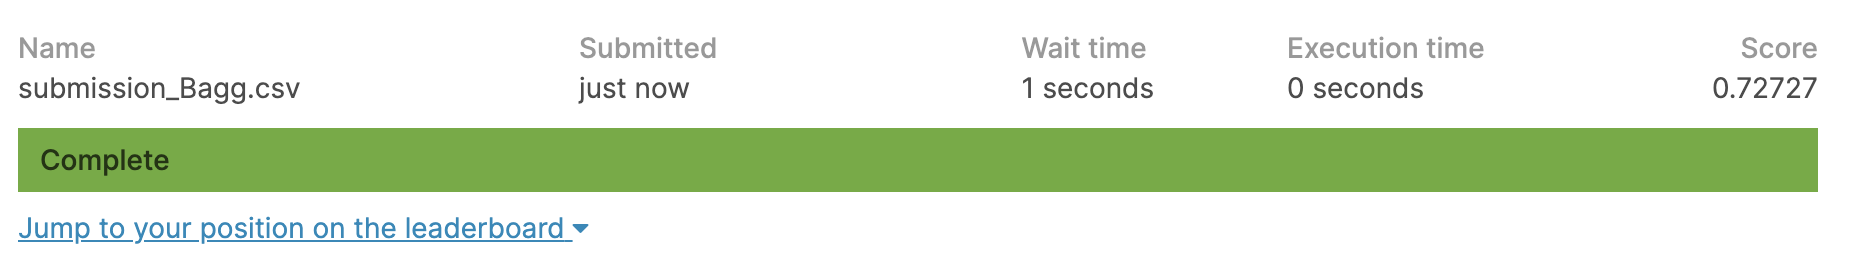

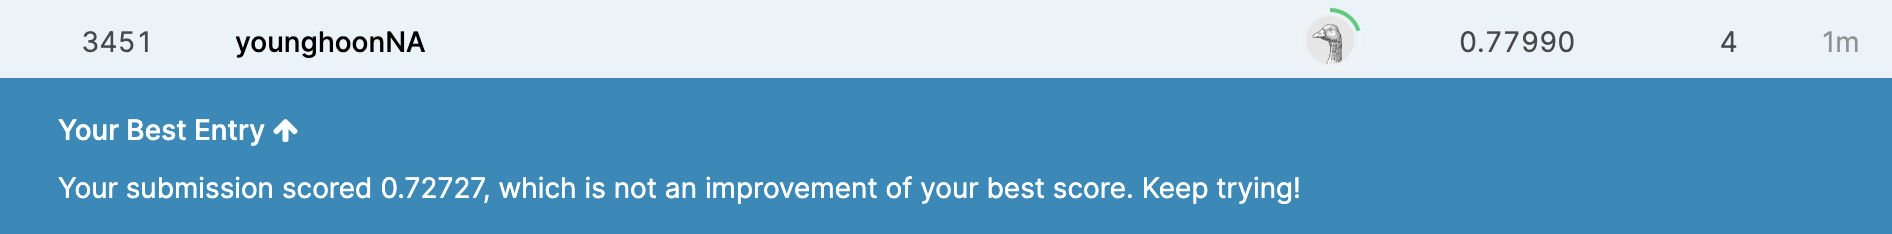

ConfusionMatrix상에서는 배깅을 사용한 모델의 예측 정확도가 더 높았지만 실제 예측 결과는 RandomForest를 사용했을 때 더 높았던 것을 볼 수 있습니다.

#### **4. SVM(Support Vector Machine)**

In [93]:
## 코드 작성

#설치해야할 패키지 중 위에서 설치한 패키지 제외하고 설치

#초기에 data.table 과 함께 선언  -> install.packages(c("tidyverse", "data.table"))
#로지스틱 회기분석               -> install.packages(c("caret", "e1071", "Hmisc"))
#의사결정 트리                  -> install.packages(c("rpart"))
#RandomForest                -> install.packages(c("ipred","randomForest"))

#SVM : install.packages(c("tidyverse", "caret", "e1071"))은 모두 설치 되어있음. 
#따라서 설치 진행X 
#단 라이브러리는 필요시 선언.

In [94]:
#str을 통해 데이터의 속성 및 데이터 타입 확인.
#범주형 데이터가 아니면 범주형 데이터로 바꿔주는 과정을 위해선 필요.
train %>% str()

#summary를 통한 결측값, 그리고 범주형 데아터 확인.
train %>% summary()

tibble [891 × 12] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [95]:
#범주형 데이터 확인.
train$Survived %>% unique()
train$Pclass %>% unique()
train$Sex %>% unique() 
train$Ticket %>% unique()
train$Embarked %>% unique()

#필요없는 문자형 데이터 제거 -> 필요한 문자형 데이터인 Embarked는 범주형으로 전환
#PassengerId -> 그냥 1부터 순차적으로 증가해서 승객 수까지 증가. 필요 없음
#이름 -> 문자형 데이터 필요없음.
#cabin -> 선실번호 -> 범주형 데이터인 Embarked와 pClass 사용할꺼니까 필요 없다고 생각이 되서 제거.
#Ticket -> 찍어보면 알겠지만 너무 다양함. 필요 없음.
train_DF <- select(train, -PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Survived","Sex","Embarked"), factor)

#필요없는 속성 제거한 데이터는 Train_DF
summary(train_DF)


[1] 0 1

[1] 3 1 2

[1] "male"   "female"

[1] "A/5 21171"          "PC 17599"           "STON/O2. 3101282"  
  [4] "113803"             "373450"             "330877"            
  [7] "17463"              "349909"             "347742"            
 [10] "237736"             "PP 9549"            "113783"            
 [13] "A/5. 2151"          "347082"             "350406"            
 [16] "248706"             "382652"             "244373"            
 [19] "345763"             "2649"               "239865"            
 [22] "248698"             "330923"             "113788"            
 [25] "347077"             "2631"               "19950"             
 [28] "330959"             "349216"             "PC 17601"          
 [31] "PC 17569"           "335677"             "C.A. 24579"        
 [34] "PC 17604"           "113789"             "2677"              
 [37] "A./5. 2152"         "345764"             "2651"              
 [40] "7546"               "11668"              "349253"            
 [43] "SC/Paris 2123"      "330958"             "S.C./A.4. 23567"   
 [46] "370371"             "14311"              "2662"              
 [49] "349237"             "3101295"            "A/4. 39886"        
 [52] "PC 17572"           "2926"               "113509"            
 [55] "19947"              "C.A. 31026"         "2697"              
 [58] "C.A. 34651"         "CA 2144"            "2669"              
 [61] "113572"             "36973"              "347088"            
 [64] "PC 17605"           "2661"               "C.A. 29395"        
 [67] "S.P. 3464"          "3101281"            "315151"            
 [70] "C.A. 33111"         "S.O.C. 14879"       "2680"              
 [73] "1601"               "348123"             "349208"            
 [76] "374746"             "248738"             "364516"            
 [79] "345767"             "345779"             "330932"            
 [82] "113059"             "SO/C 14885"         "3101278"           
 [85] "W./C. 6608"         "SOTON/OQ 392086"    "343275"            
 [88] "343276"             "347466"             "W.E.P. 5734"       
 [91] "C.A. 2315"          "364500"             "374910"            
 [94] "PC 17754"           "PC 17759"           "231919"            
 [97] "244367"             "349245"             "349215"            
[100] "35281"              "7540"               "3101276"           
[103] "349207"             "343120"             "312991"            
[106] "349249"             "371110"             "110465"            
[109] "2665"               "324669"             "4136"              
[112] "2627"               "STON/O 2. 3101294"  "370369"            
[115] "PC 17558"           "A4. 54510"          "27267"             
[118] "370372"             "C 17369"            "2668"              
[121] "347061"             "349241"             "SOTON/O.Q. 3101307"
[124] "A/5. 3337"          "228414"             "C.A. 29178"        
[127] "SC/PARIS 2133"      "11752"              "7534"              
[130] "PC 17593"           "2678"               "347081"            
[133] "STON/O2. 3101279"   "365222"             "231945"            
[136] "C.A. 33112"         "350043"             "230080"            
[139] "244310"             "S.O.P. 1166"        "113776"            
[142] "A.5. 11206"         "A/5. 851"           "Fa 265302"         
[145] "PC 17597"           "35851"              "SOTON/OQ 392090"   
[148] "315037"             "CA. 2343"           "371362"            
[151] "C.A. 33595"         "347068"             "315093"            
[154] "363291"             "113505"             "PC 17318"          
[157] "111240"             "STON/O 2. 3101280"  "17764"             
[160] "350404"             "4133"               "PC 17595"          
[163] "250653"             "LINE"               "SC/PARIS 2131"     
[166] "230136"             "315153"             "113767"            
[169] "370365"             "111428"             "364849"            
[172] "349247"             "234604"             "28424"             


[1] "S" "C" "Q" ""

 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:20.12   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.70   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
                                       NA's   :177                    
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           
                                           

In [96]:
#str 함수를 통한 범주형 데이터 변환 확인.
train_DF %>% str()

tibble [891 × 8] (S3: tbl_df/tbl/data.frame)
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 


####처음에는 na.omit를 통해 결측값을 제거하였으나 모델의 정확도가 너무 떨어져 중간값을 넣는 것으로 수정하였습니다.!

In [97]:
#결측값이 존재하는 Age 속성에 대해 impute - median를 통해 NA값을 중간값으로 채움
library(Hmisc)
train_DF$Age <- impute(train_DF$Age, median)
summary(train_DF)


 177 values imputed to 28 



 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:22.00   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.36   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:35.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           

In [98]:
#아까 summary(train_DF) 에서 Age에 결측값이 나왔으므로 결측값 제거 필요.
#머신러닝에서 데이터의 NA값 발생시 중간값으로 채우는 것 보단 제거하는게 낫다고 배웠으므로 저는 제거를 하는 쪽을 선택했습니다.
#타이나티닉은 데이터 수가 부족하다고 하셨으므로 대신 밑에서 테스트 데이터의 비율을 늘리겠습니다.
# -> 정확도가 너무 떨어져서 결측값에 중앙값 채우는 걸로 변경

# 혹시 모르니 다시 한번 결측값이 존재한다면 제거.
train_DF <- train_DF %>% na.omit()
summary(train_DF)



 177 values imputed to 28 



 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:22.00   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.36   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:35.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           

#### 다시 돌아와서 test / train set 분리

In [99]:
##train / test 셋 분리
set.seed(31)

# 11주차 강의에서 타이타닉 데이터가 별로 없어서 test : train 비율을 9:1로 나누셨다고 하셨던걸로 기억합니다.
# 저도 똑같이 9:1로 나눠 주겠습니다.
index <- caret::createDataPartition(y = train_DF$Survived, p = 0.9, list = FALSE)
train_svm <- train_DF[index, ]
test_svm <- train_DF[-index, ]

train_svm %>% show()
test_svm %>% show()

# A tibble: 803 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>     <int> <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0             3 male   22           1     0  7.25 S       
 2 1             1 female 38           1     0 71.3  C       
 3 1             3 female 26           0     0  7.92 S       
 4 1             1 female 35           1     0 53.1  S       
 5 0             3 male   35           0     0  8.05 S       
 6 0             3 male   28           0     0  8.46 Q       
 7 0             1 male   54           0     0 51.9  S       
 8 0             3 male    2           3     1 21.1  S       
 9 1             3 female 27           0     2 11.1  S       
10 1             2 female 14           1     0 30.1  C       
# … with 793 more rows
# A tibble: 88 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>     <int> <fct>  <impute> <int> <int> <dbl> <fct>   
 1 1             2 male   34.0         0     0 13    S       
 2 0    

In [100]:
# rbf // 하이퍼 파라메타 조정 X
Survived_svm <- e1071::svm(formula = Survived ~ ., data = train_svm, type = "C-classification", kernel = "radial")
summary(Survived_svm)


Call:
svm(formula = Survived ~ ., data = train_svm, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  361

 ( 183 178 )


Number of Classes:  2 

Levels: 
 0 1




In [101]:
# rbf // 하이퍼 파라메타 조정 O
Survived_svm_Hyper <- e1071::svm(formula = Survived ~ ., data = train_svm, type = "C-classification", kernel = "radial", cost = 1000, gamma = 0.1)
summary(Survived_svm_Hyper)


Call:
svm(formula = Survived ~ ., data = train_svm, type = "C-classification", 
    kernel = "radial", cost = 1000, gamma = 0.1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1000 

Number of Support Vectors:  318

 ( 174 144 )


Number of Classes:  2 

Levels: 
 0 1




In [102]:
#하이퍼 파라메타를 조정하지 않은 모델로 예측한 결과와 실제 Survived 결과 비교.
predict_value_svm <- predict(Survived_svm, test_svm) %>% tibble(predict_value_svm = .)
predict_check_svm <- test_svm %>% select(Survived) %>% dplyr::bind_cols(., predict_value_svm) 
predict_check_svm %>% show()

# A tibble: 88 × 2
   Survived predict_value_svm
   <fct>    <fct>            
 1 1        0                
 2 0        0                
 3 0        0                
 4 0        0                
 5 1        0                
 6 0        0                
 7 1        0                
 8 0        1                
 9 0        0                
10 0        0                
# … with 78 more rows


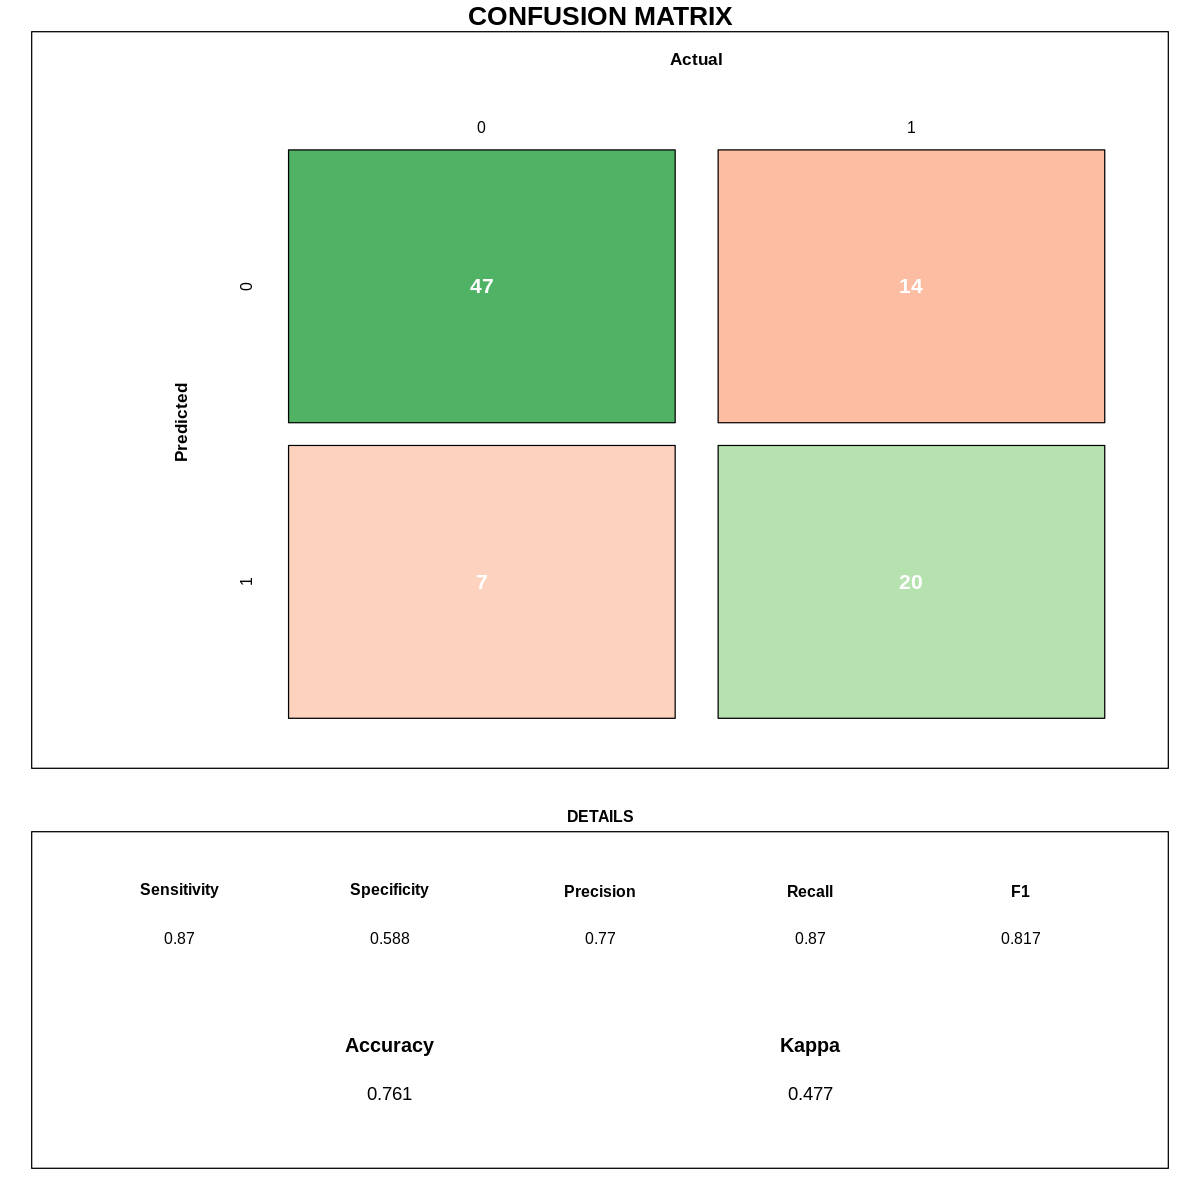

In [103]:
#하이퍼 파라메타를 조정하지 않은 모델로 예측한 결과와 실제 Survived의 오차행렬을 시각화 하였음.
cm <- caret::confusionMatrix(predict_value_svm$predict_value_svm, test_svm$Survived)
draw_confusion_matrix(cm)

In [104]:
#하이퍼 파라메타를 조절한 모델로 예측한 결과와 실제 Survived 결과 비교.
predict_value_svm_Hyper <- predict(Survived_svm_Hyper, test_svm) %>% tibble(predict_value_svm_Hyper = .)
predict_check_svm_Hyper <- test_svm %>% select(Survived) %>% dplyr::bind_cols(., predict_value_svm_Hyper) 
predict_check_svm_Hyper %>% show()

# A tibble: 88 × 2
   Survived predict_value_svm_Hyper
   <fct>    <fct>                  
 1 1        0                      
 2 0        0                      
 3 0        0                      
 4 0        0                      
 5 1        0                      
 6 0        0                      
 7 1        0                      
 8 0        0                      
 9 0        0                      
10 0        0                      
# … with 78 more rows


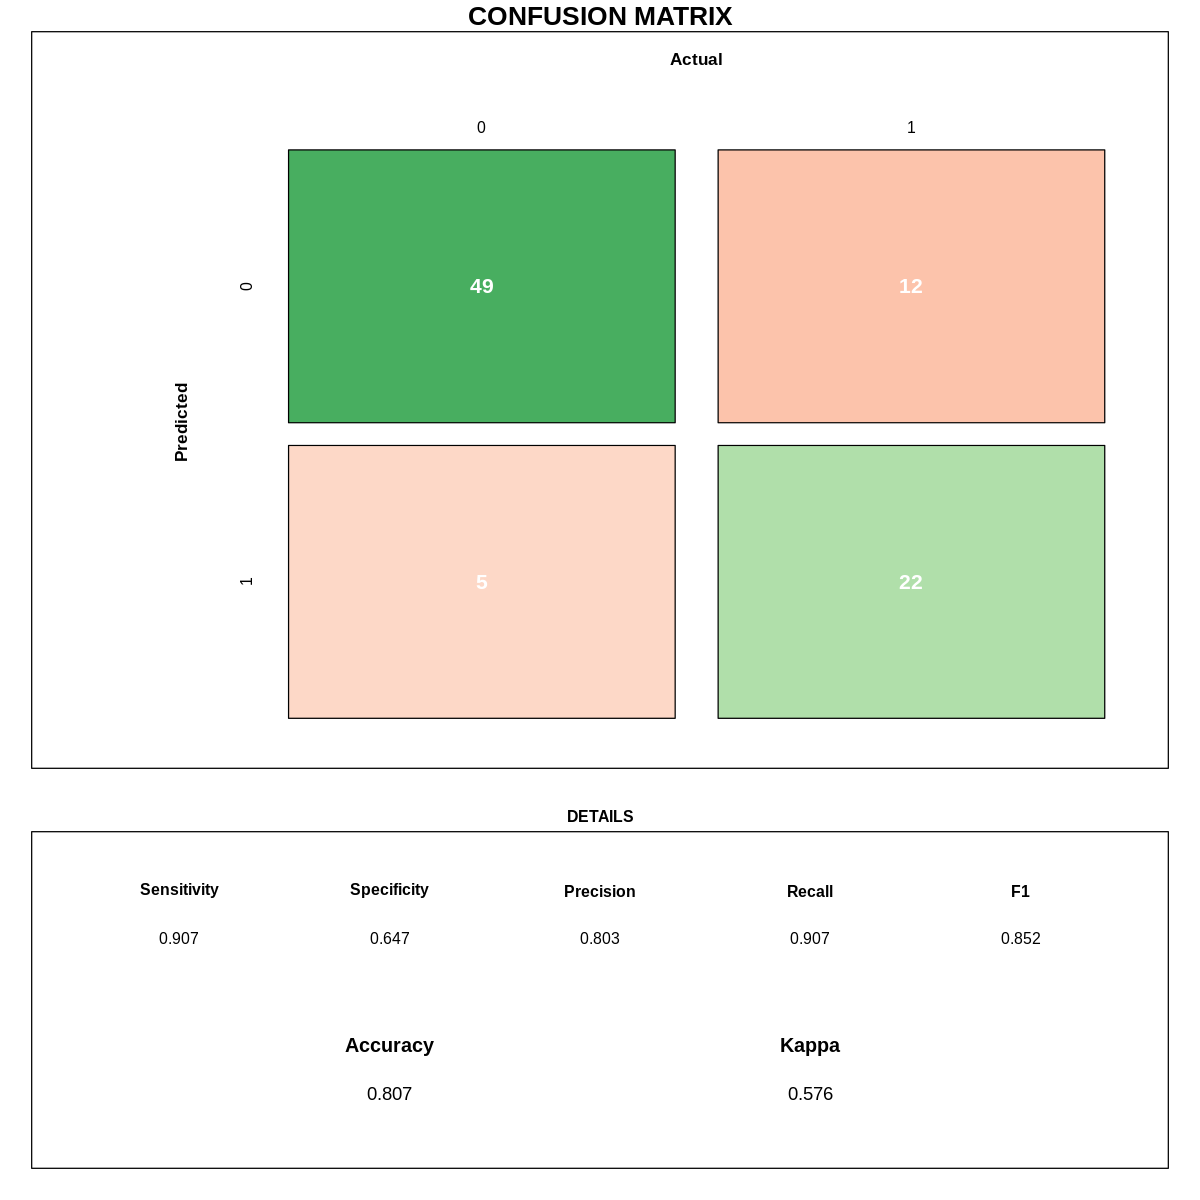

In [105]:
#하이퍼 파라메타를 조정한 모델로 예측한 결과와 실제 Survived의 오차행렬을 시각화 하였음.
cm <- caret::confusionMatrix(predict_value_svm_Hyper$predict_value_svm_Hyper, test_svm$Survived)
draw_confusion_matrix(cm)

In [ ]:
#하이퍼 파라메타를 조정한 모델의 정확도가 더 높은 것을 확인 할 수 있습니다.

In [190]:
#정확도가 더 떨어진 상황에서 tune을 사용해 최적의 gamma와 Cost를 찾아보자.
tuned_survived_svm <- e1071::tune.svm(Survived ~ ., data = train_svm, gamma = 10^(-5:5), cost = 1:30)

In [191]:
#tune_summary_survived_svm에 tune(grid)탐색 결과를 저장
tune_summary_survived_svm <- summary(tuned_survived_svm)
tune_summary_survived_svm


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1    4

- best performance: 0.1657716 

- Detailed performance results:
    gamma cost     error dispersion
1   1e-05    1 0.3836265 0.07185673
2   1e-04    1 0.3836265 0.07185673
3   1e-03    1 0.2927932 0.07420199
4   1e-02    1 0.1982253 0.06182547
5   1e-01    1 0.1683179 0.05988384
6   1e+00    1 0.1894753 0.06347648
7   1e+01    1 0.2604630 0.04955740
8   1e+02    1 0.3350617 0.06720658
9   1e+03    1 0.3525000 0.05557507
10  1e+04    1 0.3512809 0.06172908
11  1e+05    1 0.3475926 0.06778419
12  1e-05    2 0.3836265 0.07185673
13  1e-04    2 0.3836265 0.07185673
14  1e-03    2 0.2056481 0.07151028
15  1e-02    2 0.1957407 0.06140472
16  1e-01    2 0.1707870 0.06002004
17  1e+00    2 0.1956481 0.05805231
18  1e+01    2 0.2654475 0.05384962
19  1e+02    2 0.3288272 0.06171222
20  1e+03    2 0.3550000 0.05477239
21  1e+04    2 0.3525309 0.06011833
22  1e+05    2 0.3475926 

In [192]:
#best_parameta  최적의 감마값과 cost값을 저장합니다.
best_parameter <- tune_summary_survived_svm$best.parameters
best_parameter # best_parameter[1,1] == gamma / best_parameter[1,2] == cost

,gamma,cost
,<dbl>,<int>
38,0.1,4


In [193]:
#최적의 감마값과 cost값을 넣은 Svm모델을 만듭니다.
svm_Survived_TUNED <- e1071::svm(Survived ~ ., data = train_svm, type = "C-classification", kernel = "radial",
 gamma = best_parameter[1,1], cost = best_parameter[1,2])

In [194]:
#튜닝을 완료한 svm모델로 test데이터 예측 
predict_value_svm_TUNED <- predict(svm_Survived_TUNED, test_svm) %>% tibble(predict_value_svm_TUNED = .)
predict_check_svm_TUNED <- test_svm %>% select(Survived) %>% dplyr::bind_cols(., predict_value_svm_TUNED) 
predict_check_svm_TUNED %>% show()

# A tibble: 88 × 2
   Survived predict_value_svm_TUNED
   <fct>    <fct>                  
 1 1        0                      
 2 0        0                      
 3 0        0                      
 4 0        0                      
 5 1        0                      
 6 0        0                      
 7 1        0                      
 8 0        0                      
 9 0        0                      
10 0        0                      
# … with 78 more rows


#### 케글을 통해 데이터를 찍어보자

In [195]:
#str을 통해 데이터의 속성 및 데이터 타입 확인.
#범주형 데이터가 아니면 범주형 데이터로 바꿔주는 과정을 위해선 필요.
test %>% str()

#summary를 통한 결측값, 그리고 범주형 데아터 확인.
test %>% summary()

tibble [418 × 11] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:418] 892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int [1:418] 3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr [1:418] "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr [1:418] "male" "female" "male" "male" ...
 $ Age        : num [1:418] 34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int [1:418] 0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int [1:418] 0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr [1:418] "330911" "363272" "240276" "315154" ...
 $ Fare       : num [1:418] 7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr [1:418] "" "" "" "" ...
 $ Embarked   : chr [1:418] "Q" "S" "Q" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :30.27   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

In [196]:
#범주형 데이터 확인.
test$Pclass %>% unique()
test$Sex %>% unique() 
#티켓은 너무 많으므로 앞의 30개만
test$Ticket %>% unique() %>% head(30)
test$Embarked %>% unique()

#필요없는 문자형 데이터 제거 -> 필요한 문자형 데이터인 Embarked는 범주형으로 전환
#PassengerId -> 그냥 1부터 순차적으로 증가해서 승객 수까지 증가. 필요 없음
#이름 -> 문자형 데이터 필요없음.
#cabin -> 선실번호 -> 범주형 데이터인 Embarked와 pClass 사용할꺼니까 필요 없다고 생각이 되서 제거.
#Ticket -> 찍어보면 알겠지만 너무 다양함. 필요 없음.
test_DF <- select(test, -PassengerId, -Name, -Cabin, -Ticket) %>% mutate_at(c("Sex","Embarked"), factor)

#필요없는 속성 제거한 데이터는 Train_DF
summary(test_DF)


[1] 3 2 1

[1] "male"   "female"

[1] "330911"           "363272"           "240276"           "315154"          
 [5] "3101298"          "7538"             "330972"           "248738"          
 [9] "2657"             "A/4 48871"        "349220"           "694"             
[13] "21228"            "24065"            "W.E.P. 5734"      "SC/PARIS 2167"   
[17] "233734"           "2692"             "STON/O2. 3101270" "2696"            
[21] "PC 17603"         "C 17368"          "PC 17598"         "PC 17597"        
[25] "PC 17608"         "A/5. 3337"        "113509"           "2698"            
[29] "113054"           "2662"

[1] "Q" "S" "C"

     Pclass          Sex           Age            SibSp            Parch       
 Min.   :1.000   female:152   Min.   : 0.17   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   male  :266   1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :3.000                Median :27.00   Median :0.0000   Median :0.0000  
 Mean   :2.266                Mean   :30.27   Mean   :0.4474   Mean   :0.3923  
 3rd Qu.:3.000                3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :3.000                Max.   :76.00   Max.   :8.0000   Max.   :9.0000  
                              NA's   :86                                       
      Fare         Embarked
 Min.   :  0.000   C:102   
 1st Qu.:  7.896   Q: 46   
 Median : 14.454   S:270   
 Mean   : 35.627           
 3rd Qu.: 31.500           
 Max.   :512.329           
 NA's   :1                 

In [197]:
#str 함수를 통한 범주형 데이터 변환 확인.
test_DF %>% str()

tibble [418 × 7] (S3: tbl_df/tbl/data.frame)
 $ Pclass  : int [1:418] 3 3 2 3 3 3 3 2 3 3 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age     : num [1:418] 34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp   : int [1:418] 0 1 0 0 1 0 0 1 0 2 ...
 $ Parch   : int [1:418] 0 0 0 0 1 0 0 1 0 0 ...
 $ Fare    : num [1:418] 7.83 7 9.69 8.66 12.29 ...
 $ Embarked: Factor w/ 3 levels "C","Q","S": 2 3 2 3 3 3 2 3 1 3 ...
 - attr(*, ".internal.selfref")=<externalptr> 


####처음에는 na.omit를 통해 결측값을 제거하였으나 모델의 정확도가 너무 떨어져 중간값을 넣는 것으로 수정하였습니다.!

In [198]:
#결측값이 존재하는 Age 속성에 대해 impute - median를 통해 NA값을 중간값으로 채움
library(Hmisc)
test_DF$Age <- impute(test_DF$Age, median)
test_DF$Fare <- impute(test_DF$Fare, median)

summary(test_DF)


 86 values imputed to 27 


 1 values imputed to 14.4542 



     Pclass          Sex           Age            SibSp            Parch       
 Min.   :1.000   female:152   Min.   : 0.17   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   male  :266   1st Qu.:23.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :3.000                Median :27.00   Median :0.0000   Median :0.0000  
 Mean   :2.266                Mean   :29.60   Mean   :0.4474   Mean   :0.3923  
 3rd Qu.:3.000                3rd Qu.:35.75   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :3.000                Max.   :76.00   Max.   :8.0000   Max.   :9.0000  
      Fare         Embarked
 Min.   :  0.000   C:102   
 1st Qu.:  7.896   Q: 46   
 Median : 14.454   S:270   
 Mean   : 35.577           
 3rd Qu.: 31.472           
 Max.   :512.329           

In [199]:
#아까 summary(train_DF) 에서 Age에 결측값이 나왔으므로 결측값 제거 필요.
#머신러닝에서 데이터의 NA값 발생시 중간값으로 채우는 것 보단 제거하는게 낫다고 배웠으므로 저는 제거를 하는 쪽을 선택했습니다.
#타이나티닉은 데이터 수가 부족하다고 하셨으므로 대신 밑에서 테스트 데이터의 비율을 늘리겠습니다.
# -> 정확도가 너무 떨어져서 결측값에 중앙값 채우는 걸로 변경하였습니다.

# 혹시 모르니 다시 한번 결측값이 존재한다면 제거.
test_DF_svm <- test_DF %>% na.omit()
summary(test_DF_svm)



 86 values imputed to 27 


 1 values imputed to 14.4542 



     Pclass          Sex           Age            SibSp            Parch       
 Min.   :1.000   female:152   Min.   : 0.17   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   male  :266   1st Qu.:23.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :3.000                Median :27.00   Median :0.0000   Median :0.0000  
 Mean   :2.266                Mean   :29.60   Mean   :0.4474   Mean   :0.3923  
 3rd Qu.:3.000                3rd Qu.:35.75   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :3.000                Max.   :76.00   Max.   :8.0000   Max.   :9.0000  
      Fare         Embarked
 Min.   :  0.000   C:102   
 1st Qu.:  7.896   Q: 46   
 Median : 14.454   S:270   
 Mean   : 35.577           
 3rd Qu.: 31.472           
 Max.   :512.329           

In [200]:
#test 데이터 보기
test_DF_svm %>% show()

# A tibble: 418 × 7
   Pclass Sex      Age SibSp Parch  Fare Embarked
    <int> <fct>  <dbl> <int> <int> <dbl> <fct>   
 1      3 male    34.5     0     0  7.83 Q       
 2      3 female  47       1     0  7    S       
 3      2 male    62       0     0  9.69 Q       
 4      3 male    27       0     0  8.66 S       
 5      3 female  22       1     1 12.3  S       
 6      3 male    14       0     0  9.22 S       
 7      3 female  30       0     0  7.63 Q       
 8      2 male    26       1     1 29    S       
 9      3 female  18       0     0  7.23 C       
10      3 male    21       2     0 24.2  S       
# … with 408 more rows


#### <font color=red> 에러발생 </font>

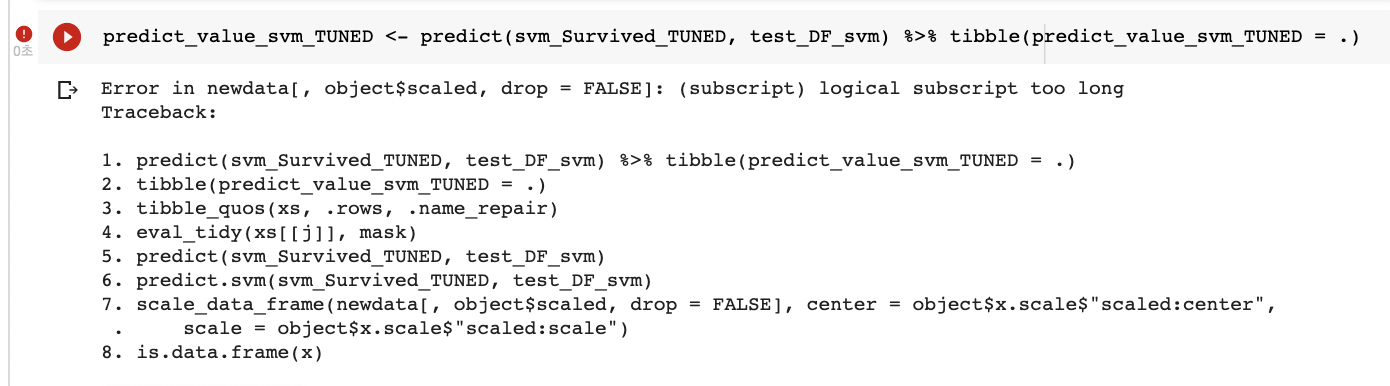

In [201]:
#이번에는 logical subscript too long Traceback: 라는 오류가 발생하였습니다.
# https://stackoverflow.com/questions/17109219/getting-an-error-subscript-logical-subscript-too-long-while-training-svm-fro 
# 스택 오버플로우를 참조하여 범주형 데이터의 속성값이 시작할 떄 "∙" 이 찍히면서 level이 다르게 되기 때문이라는 것을 알게 되었습니다. 
# 위의 RandomForest에서의 해결방법과 동일하지만, svm에서는 오류가 다르게 뜨는 것을 확인할 수 있었습니다.

In [202]:
#test_DF_svm, test_svm의 Embarked의 범주 확인
levels(test_DF_svm$Embarked)
levels(test_svm$Embarked)

[1] "C" "Q" "S"

[1] ""  "C" "Q" "S"

In [203]:
#type of predictors in new data do not match that of the training data.에러 발생 

#https://stackoverflow.com/questions/24829674/r-random-forest-error-type-of-predictors-in-new-data-do-not-match 참조하여 
#levels (테스트 데이터$속성) , levels (훈련 데이터$속성) 을 통해 모든 속성에 대해서 출력해본 결과
#Embarked 속성이 달랐다는 점을 알게되었고 다음과 같은 코드를 통해 해결 하였습니다. 
levels(test_DF_svm$Embarked) <- levels(test_svm$Embarked)

#### 다시 Svm 모델로 케글의 test 데이터 예측

In [204]:
#튜닝을 완료한 svm 모델로 test데이터 예측 후 csv에 저장
predict_svm_kaggle <- predict(svm_Survived_TUNED, test_DF_svm) %>% tibble(Survived = .)
submission_svm <- test %>% select(PassengerId) %>% dplyr::bind_cols(., predict_svm_kaggle) %>% write_csv(path = "submission_svm.csv")

In [205]:
#튜닝을 완료한 svm 모델로 test데이터 예측결과 
predict_svm_kaggle %>% show()

# A tibble: 418 × 1
   Survived
   <fct>   
 1 0       
 2 1       
 3 0       
 4 0       
 5 1       
 6 0       
 7 1       
 8 0       
 9 1       
10 0       
# … with 408 more rows


# SVM rbf 모델을 통해 학습후 예측 데이터 케글 업로드 후 결과 확인.

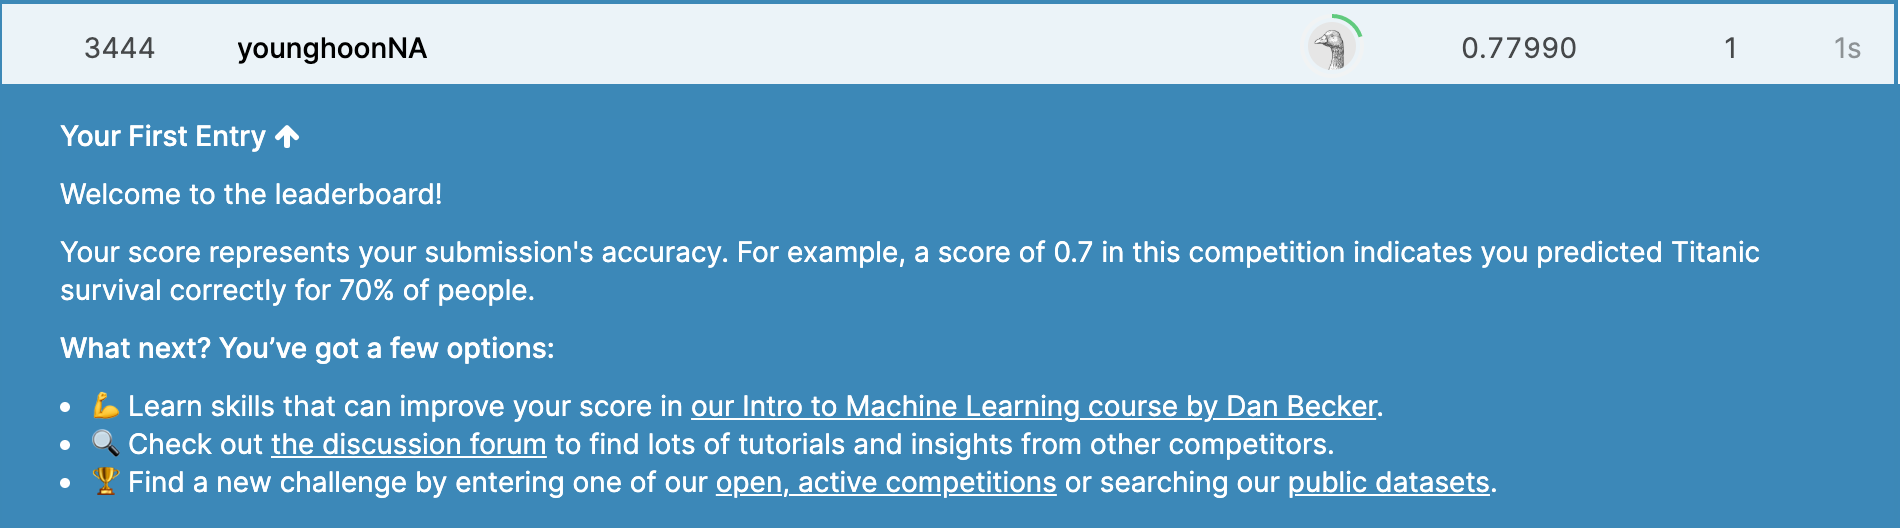

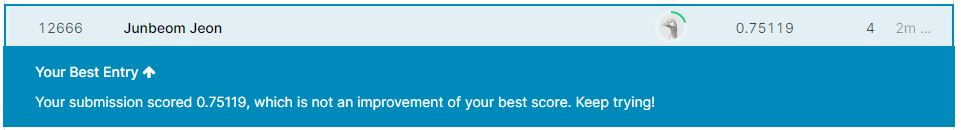

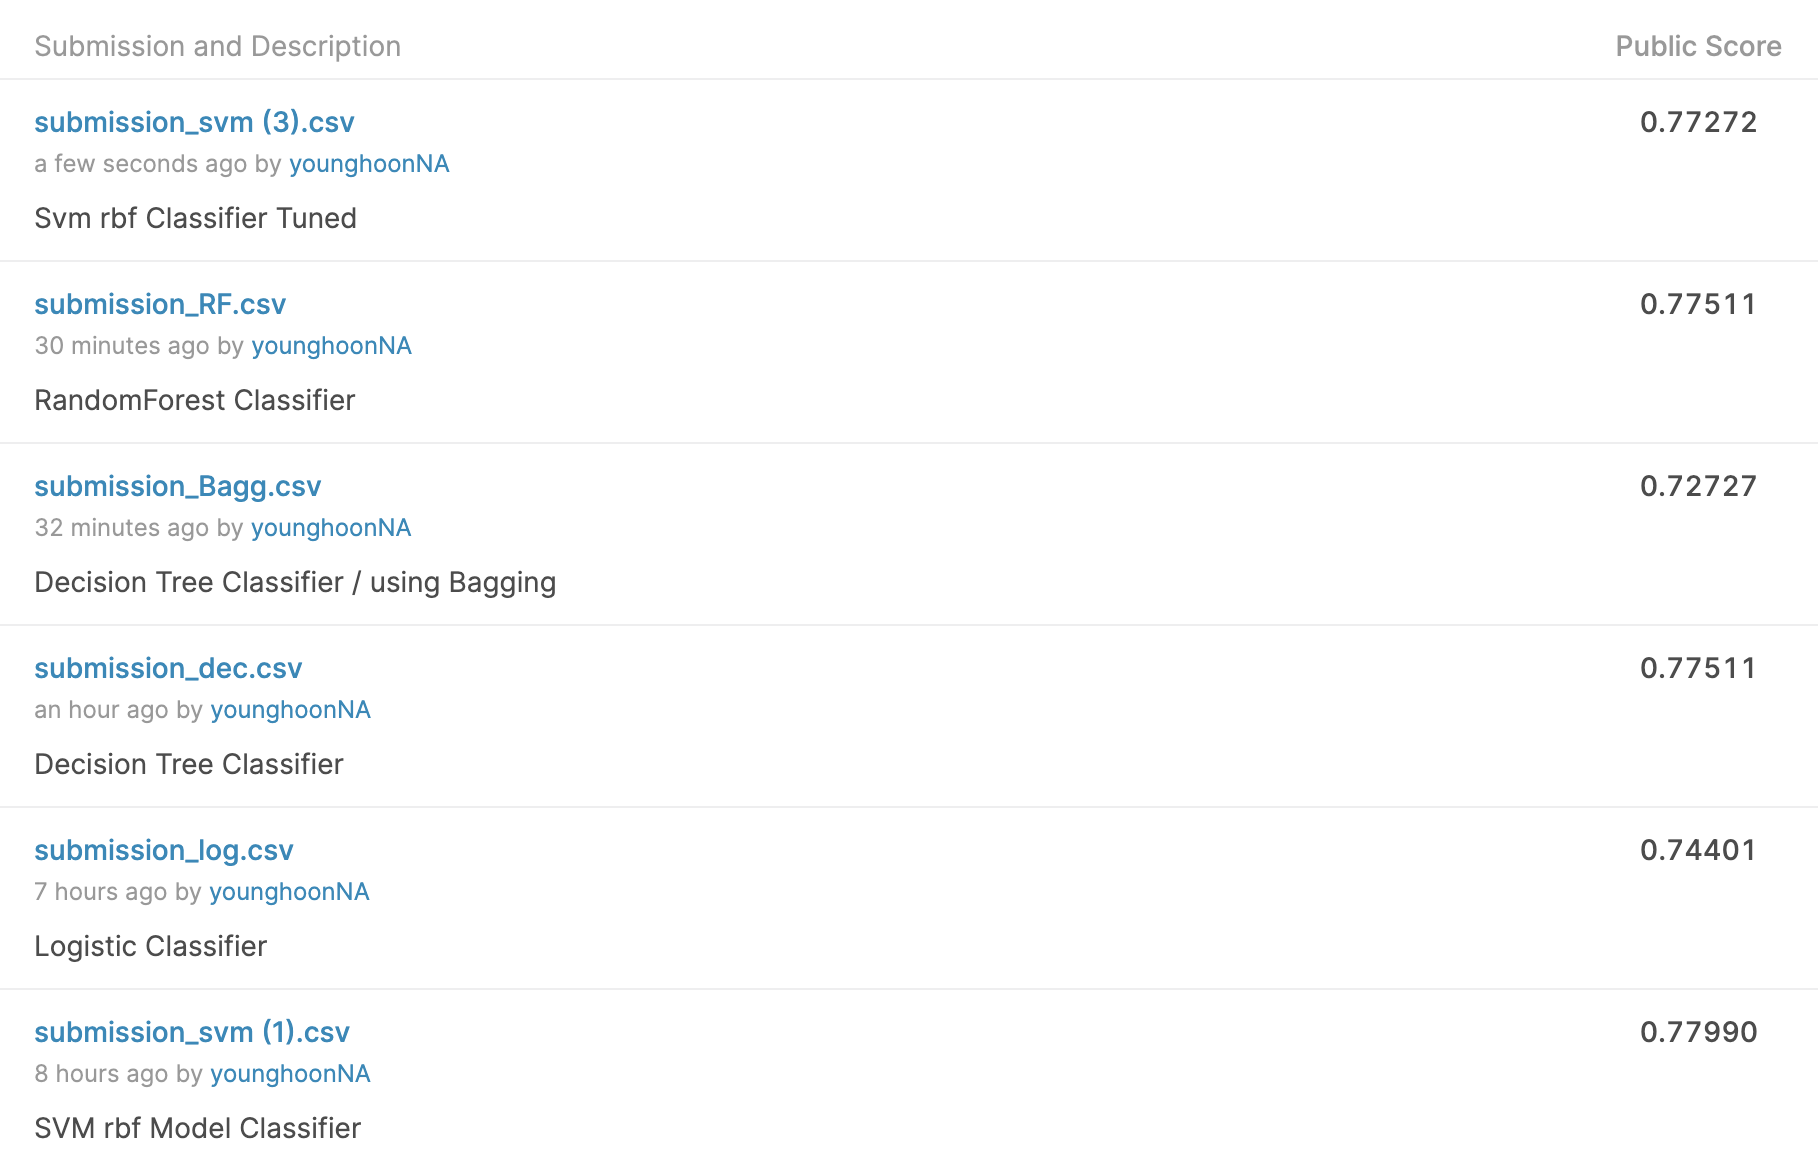

케글에 올린 순서는 밑에서부터 svm -> 로지스틱 -> 의사결정트리 -> 배깅 -> 랜덤포리스트 -> svm 재 튜닝 입니다.

이번 프로젝트의 결과 svm 모델을 튜닝한 모델이 결과가 가장 잘 나왔습니다.

https://www.kaggle.com/c/titanic/rules 

에 접속하여 자신의 submission.csv를 등록하여 점수를 획득 하세요.